In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import splat
import splat.database as spdb
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem
import seaborn as sns
import warnings
import copy
import astropy.units as u
import scipy.stats
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [180]:
import splat.empirical as spem

In [181]:
#Importing the source table
df_photometry = pd.read_csv('https://raw.githubusercontent.com/ZJI17/skrzypek2016/main/skrzypek2016.csv',delimiter=',')

In [182]:
df_photometry

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,e_W1mag,W2mag,e_W2mag,PhType,chi2,SpType,Ref,Simbad,_RA,_DE
0,J000005.87+152354.4,21.3,0.13,19.5,0.12,18.47,0.04,17.27,0.03,16.51,...,,,,L2:,2.22,,,Simbad,0.02446,15.39844
1,J000100.45+065259.6,18.62,0.02,16.56,0.02,15.70,0.01,14.76,0.01,14.08,...,0.02,13.02,0.03,L0,5.62,,,Simbad,0.25187,6.88322
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.02,12.54,0.02,L5.5p,55.82,L4,11,Simbad,0.30100,15.59286
3,J000131.90+073528.1,21.02,0.06,19.08,0.06,18.13,0.03,17.18,0.02,16.43,...,0.05,15.38,0.1,L0,3.75,,,Simbad,0.38292,7.59114
4,J000158.77+020759.6,20.77,0.06,18.62,0.04,17.75,0.02,16.59,0.01,15.94,...,0.04,14.8,0.07,L1,3.78,,,Simbad,0.49487,2.13322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,J235731.54+003721.1,20.63,0.06,18.77,0.05,17.86,0.03,16.85,0.02,16.21,...,0.04,15.13,0.1,L0,2.91,,,Simbad,359.38142,0.62253
1357,J235803.08-001548.3,20.81,0.06,18.67,0.04,17.88,0.03,16.79,0.01,16.10,...,0.04,15.01,0.09,L0.5,3.37,,,Simbad,359.51283,-0.26342
1358,J235842.01+000621.6,21.72,0.11,19.49,0.08,18.45,0.04,17.23,0.02,16.50,...,0.04,15.18,0.09,L2.5,7.00,L1.5,10,Simbad,359.67504,0.10600
1359,J235935.80+050404.8,21.27,0.12,19,0.08,18.29,0.04,17.22,0.03,16.49,...,0.05,15.45,0.12,L1,6.19,,,Simbad,359.89917,5.06800


In [183]:
# have a look about the type of the columns
df_photometry.dtypes

ULAS        object
imag        object
e_imag      object
zmag        object
e_zmag      object
Ymag       float64
e_Ymag     float64
Jmag       float64
e_Jmag     float64
Hmag       float64
e_Hmag     float64
Kmag       float64
e_Kmag     float64
W1mag       object
e_W1mag     object
W2mag       object
e_W2mag     object
PhType      object
chi2       float64
SpType      object
Ref         object
Simbad      object
_RA        float64
_DE        float64
dtype: object

In [184]:
# change some columns into float64
df_photometry["imag"] = pd.to_numeric(df_photometry["imag"],errors="coerce")
df_photometry["e_imag"] = pd.to_numeric(df_photometry["e_imag"],errors="coerce")
df_photometry["zmag"] = pd.to_numeric(df_photometry["zmag"],errors="coerce")
df_photometry["e_zmag"] = pd.to_numeric(df_photometry["e_zmag"],errors="coerce")
df_photometry["W1mag"] = pd.to_numeric(df_photometry["W1mag"],errors="coerce")
df_photometry["e_W1mag"] = pd.to_numeric(df_photometry["e_W1mag"],errors="coerce")
df_photometry["W2mag"] = pd.to_numeric(df_photometry["W2mag"],errors="coerce")
df_photometry["e_W2mag"] = pd.to_numeric(df_photometry["e_W2mag"],errors="coerce")
df_photometry["PhType"] = pd.to_numeric(df_photometry["Ref"],errors="coerce")
#df_photometry["SpType"] = pd.to_numeric(df_photometry["Ref"],errors="coerce")
df_photometry["Ref"] = pd.to_numeric(df_photometry["Ref"],errors="coerce")

In [185]:
df_photometry.dtypes

ULAS        object
imag       float64
e_imag     float64
zmag       float64
e_zmag     float64
Ymag       float64
e_Ymag     float64
Jmag       float64
e_Jmag     float64
Hmag       float64
e_Hmag     float64
Kmag       float64
e_Kmag     float64
W1mag      float64
e_W1mag    float64
W2mag      float64
e_W2mag    float64
PhType     float64
chi2       float64
SpType      object
Ref        float64
Simbad      object
_RA        float64
_DE        float64
dtype: object

In [186]:
#make a copy
dfsel =df_photometry

In [187]:
print(dfsel["SpType"])

0              
1              
2       L4     
3              
4              
         ...   
1356           
1357           
1358    L1.5   
1359           
1360           
Name: SpType, Length: 1361, dtype: object


In [188]:
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,e_W1mag,W2mag,e_W2mag,PhType,chi2,SpType,Ref,Simbad,_RA,_DE
0,J000005.87+152354.4,21.30,0.13,19.50,0.12,18.47,0.04,17.27,0.03,16.51,...,NaN,NaN,NaN,NaN,2.22,,NaN,Simbad,0.02446,15.39844
1,J000100.45+065259.6,18.62,0.02,16.56,0.02,15.70,0.01,14.76,0.01,14.08,...,0.02,13.02,0.03,NaN,5.62,,NaN,Simbad,0.25187,6.88322
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.02,12.54,0.02,11.0,55.82,L4,11.0,Simbad,0.30100,15.59286
3,J000131.90+073528.1,21.02,0.06,19.08,0.06,18.13,0.03,17.18,0.02,16.43,...,0.05,15.38,0.10,NaN,3.75,,NaN,Simbad,0.38292,7.59114
4,J000158.77+020759.6,20.77,0.06,18.62,0.04,17.75,0.02,16.59,0.01,15.94,...,0.04,14.80,0.07,NaN,3.78,,NaN,Simbad,0.49487,2.13322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,J235731.54+003721.1,20.63,0.06,18.77,0.05,17.86,0.03,16.85,0.02,16.21,...,0.04,15.13,0.10,NaN,2.91,,NaN,Simbad,359.38142,0.62253
1357,J235803.08-001548.3,20.81,0.06,18.67,0.04,17.88,0.03,16.79,0.01,16.10,...,0.04,15.01,0.09,NaN,3.37,,NaN,Simbad,359.51283,-0.26342
1358,J235842.01+000621.6,21.72,0.11,19.49,0.08,18.45,0.04,17.23,0.02,16.50,...,0.04,15.18,0.09,10.0,7.00,L1.5,10.0,Simbad,359.67504,0.10600
1359,J235935.80+050404.8,21.27,0.12,19.00,0.08,18.29,0.04,17.22,0.03,16.49,...,0.05,15.45,0.12,NaN,6.19,,NaN,Simbad,359.89917,5.06800


In [189]:
dfsel["SpType"].loc[38]

'M9.5   '

In [190]:
dfsel["SpType"]

0              
1              
2       L4     
3              
4              
         ...   
1356           
1357           
1358    L1.5   
1359           
1360           
Name: SpType, Length: 1361, dtype: object

In [191]:
convertion = {
"" : np.NAN,    
"M0" : 10,
"M0.5" : 11,
"M1" : 12,
"M1.5" : 13,
"M2" : 14,
"M2.5" : 15,
"M3" : 16,
"M3.5" : 17,
"M4" : 18,
"M4.5" : 19,
"M5" : 20,
"M5.5" : 21,
"M6" : 22,
"M6.5" : 23,
"M7" : 24,
"M7.5" : 25,
"M8" : 26,
"M8.5" : 27,
"M9" : 28,
"M9.5" : 29,
"L0" : 30,
"L0.5" : 31,
"L1" : 32,
"L1.5" : 33,
"L2" : 34,
"L2.5" : 35,
"L3" : 36,
"L3.5" : 37,
"L4" : 38,
"L4.5" : 39,
"L5" : 40,
"L5.5" : 41,
"L6" : 42,
"L6.5" : 43,
"L7" : 44,
"L7.5" : 45,
"L8" : 46,
"L8.5" : 47,
"L9" : 48,
"L9.5" : 49,
"T0" : 50,
"T0.5" : 51,
"T1" : 52,
"T1.5" : 53,
"T2" : 54,
"T2.5" : 55,
"T3" : 56,
"T3.5" : 57,
"T4" : 58,
"T4.5" : 59,
"T5" : 60,
"T5.5" : 61,
"T6" : 62,
"T6.5" : 63,
"T7" : 64,
"T7.5" : 65,
"T8" : 66,
"T8.5" : 67,
"T9" : 68,
"T9.5" : 69,
"T1+T4" : 52}

In [192]:
#replace the conversion and remove the space and :
dfsel["SpType"].str.strip().str.strip(":").replace(convertion)

0        NaN
1        NaN
2       38.0
3        NaN
4        NaN
        ... 
1356     NaN
1357     NaN
1358    33.0
1359     NaN
1360     NaN
Name: SpType, Length: 1361, dtype: float64

In [193]:
#creating a new column
dfsel["SpectralTnum"] =dfsel["SpType"].str.strip().str.strip(":").replace(convertion)

In [194]:
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,W2mag,e_W2mag,PhType,chi2,SpType,Ref,Simbad,_RA,_DE,SpectralTnum
0,J000005.87+152354.4,21.30,0.13,19.50,0.12,18.47,0.04,17.27,0.03,16.51,...,NaN,NaN,NaN,2.22,,NaN,Simbad,0.02446,15.39844,NaN
1,J000100.45+065259.6,18.62,0.02,16.56,0.02,15.70,0.01,14.76,0.01,14.08,...,13.02,0.03,NaN,5.62,,NaN,Simbad,0.25187,6.88322,NaN
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,12.54,0.02,11.0,55.82,L4,11.0,Simbad,0.30100,15.59286,38.0
3,J000131.90+073528.1,21.02,0.06,19.08,0.06,18.13,0.03,17.18,0.02,16.43,...,15.38,0.10,NaN,3.75,,NaN,Simbad,0.38292,7.59114,NaN
4,J000158.77+020759.6,20.77,0.06,18.62,0.04,17.75,0.02,16.59,0.01,15.94,...,14.80,0.07,NaN,3.78,,NaN,Simbad,0.49487,2.13322,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,J235731.54+003721.1,20.63,0.06,18.77,0.05,17.86,0.03,16.85,0.02,16.21,...,15.13,0.10,NaN,2.91,,NaN,Simbad,359.38142,0.62253,NaN
1357,J235803.08-001548.3,20.81,0.06,18.67,0.04,17.88,0.03,16.79,0.01,16.10,...,15.01,0.09,NaN,3.37,,NaN,Simbad,359.51283,-0.26342,NaN
1358,J235842.01+000621.6,21.72,0.11,19.49,0.08,18.45,0.04,17.23,0.02,16.50,...,15.18,0.09,10.0,7.00,L1.5,10.0,Simbad,359.67504,0.10600,33.0
1359,J235935.80+050404.8,21.27,0.12,19.00,0.08,18.29,0.04,17.22,0.03,16.49,...,15.45,0.12,NaN,6.19,,NaN,Simbad,359.89917,5.06800,NaN


In [195]:
#the column 38 is a M9.5 type, is that correct?, does the convertion did it correctly?
dfsel["SpectralTnum"].loc[38]

29.0

In [196]:
#lets get the colors
dfsel["i-z"] = dfsel["imag"]-dfsel["zmag"]
dfsel["i-Y"] = dfsel["imag"]-dfsel["Ymag"]
dfsel["i-J"] = dfsel["imag"]-dfsel["Jmag"]
dfsel["i-H"] = dfsel["imag"]-dfsel["Hmag"]
dfsel["i-K"] = dfsel["imag"]-dfsel["Kmag"]
dfsel["i-W1"] = dfsel["imag"]-dfsel["W1mag"]
dfsel["i-W2"] = dfsel["imag"]-dfsel["W2mag"]
dfsel['z-Y'] = dfsel['zmag']-dfsel['Ymag']
dfsel['z-J'] = dfsel['zmag']-dfsel['Jmag']
dfsel['z-H'] = dfsel['zmag']-dfsel['Hmag']
dfsel['z-K'] = dfsel['zmag']-dfsel['Kmag']
dfsel['z-W1'] = dfsel['zmag']-dfsel['W1mag']
dfsel['z-W2'] = dfsel['zmag']-dfsel['W2mag']
dfsel['Y-J'] = dfsel['Ymag']-dfsel['Jmag']
dfsel['Y-H'] = dfsel['Ymag']-dfsel['Hmag']
dfsel['Y-K'] = dfsel['Ymag']-dfsel['Kmag']
dfsel['Y-W1'] = dfsel['Ymag']-dfsel['W1mag']
dfsel['Y-W2'] = dfsel['Ymag']-dfsel['W2mag']
dfsel['J-H'] = dfsel['Jmag']-dfsel['Hmag']
dfsel['J-K'] = dfsel['Jmag']-dfsel['Kmag']
dfsel['J-W1'] = dfsel['Jmag']-dfsel['W1mag']
dfsel['J-W2'] = dfsel['Jmag']-dfsel['W2mag']
dfsel['H-K'] = dfsel['Hmag']-dfsel['Kmag']
dfsel['H-W1'] = dfsel['Hmag']-dfsel['W1mag']
dfsel['H-W2'] = dfsel['Hmag']-dfsel['W2mag']
dfsel['K-W1'] = dfsel['Kmag']-dfsel['W1mag']
dfsel['K-W2'] = dfsel['Kmag']-dfsel['W2mag']
dfsel['W1-W2'] = dfsel['W1mag']-dfsel['W2mag']
dfsel['I-Z unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_zmag']**2)
dfsel['I-Y unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Ymag']**2)
dfsel['I-J unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Jmag']**2)
dfsel['I-H unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Hmag']**2)
dfsel['I-K unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Kmag']**2)
dfsel['I-W1 unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_W1mag']**2)
dfsel['I-W2 unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_W2mag']**2)
dfsel['Z-Y unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Ymag']**2)
dfsel['Z-J unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Jmag']**2)
dfsel['Z-H unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Hmag']**2)
dfsel['Z-K unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Kmag']**2)
dfsel['Z-W1 unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_W1mag']**2)
dfsel['Z-W2 unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_W2mag']**2)
dfsel['Y-J unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_Jmag']**2)
dfsel['Y-H unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_Hmag']**2)
dfsel['Y-K unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_Kmag']**2)
dfsel['Y-W1 unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_W1mag']**2)
dfsel['Y-W2 unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_W2mag']**2)
dfsel['J-H unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_Hmag']**2)
dfsel['J-K unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_Kmag']**2)
dfsel['J-W1 unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_W1mag']**2)
dfsel['J-W2 unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_W2mag']**2)
dfsel['H-K unc'] = np.sqrt(dfsel['e_Hmag']**2+dfsel['e_Kmag']**2)
dfsel['H-W1 unc'] = np.sqrt(dfsel['e_Hmag']**2+dfsel['e_W1mag']**2)
dfsel['H-W2 unc'] = np.sqrt(dfsel['e_Hmag']**2+dfsel['e_W2mag']**2)
dfsel['K-W1 unc'] = np.sqrt(dfsel['e_Kmag']**2+dfsel['e_W1mag']**2)
dfsel['K-W2 unc'] = np.sqrt(dfsel['e_Kmag']**2+dfsel['e_W2mag']**2)
dfsel['W1-W2 unc'] = np.sqrt(dfsel['e_W1mag']**2+dfsel['e_W2mag']**2)
dfsel


,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
0,J000005.87+152354.4,21.30,0.13,19.50,0.12,18.47,0.04,17.27,0.03,16.51,...,0.042426,0.042426,NaN,NaN,0.042426,NaN,NaN,NaN,NaN,NaN
1,J000100.45+065259.6,18.62,0.02,16.56,0.02,15.70,0.01,14.76,0.01,14.08,...,0.014142,0.014142,0.022361,0.031623,0.014142,0.022361,0.031623,0.022361,0.031623,0.036056
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284
3,J000131.90+073528.1,21.02,0.06,19.08,0.06,18.13,0.03,17.18,0.02,16.43,...,0.036056,0.036056,0.053852,0.101980,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803
4,J000158.77+020759.6,20.77,0.06,18.62,0.04,17.75,0.02,16.59,0.01,15.94,...,0.014142,0.014142,0.041231,0.070711,0.014142,0.041231,0.070711,0.041231,0.070711,0.080623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,J235731.54+003721.1,20.63,0.06,18.77,0.05,17.86,0.03,16.85,0.02,16.21,...,0.036056,0.036056,0.044721,0.101980,0.042426,0.050000,0.104403,0.050000,0.104403,0.107703
1357,J235803.08-001548.3,20.81,0.06,18.67,0.04,17.88,0.03,16.79,0.01,16.10,...,0.022361,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489
1358,J235842.01+000621.6,21.72,0.11,19.49,0.08,18.45,0.04,17.23,0.02,16.50,...,0.036056,0.036056,0.044721,0.092195,0.042426,0.050000,0.094868,0.050000,0.094868,0.098489
1359,J235935.80+050404.8,21.27,0.12,19.00,0.08,18.29,0.04,17.22,0.03,16.49,...,0.036056,0.036056,0.058310,0.123693,0.028284,0.053852,0.121655,0.053852,0.121655,0.130000


In [197]:
#removing the missing data
dfsel = dfsel[dfsel['i-z'].notna()==True]
dfsel = dfsel[dfsel['i-Y'].notna()==True]
dfsel = dfsel[dfsel['i-J'].notna()==True]
dfsel = dfsel[dfsel['i-H'].notna()==True]
dfsel = dfsel[dfsel['i-K'].notna()==True]
dfsel = dfsel[dfsel['i-W1'].notna()==True]
dfsel = dfsel[dfsel['i-W2'].notna()==True]
dfsel = dfsel[dfsel['z-Y'].notna()==True]
dfsel = dfsel[dfsel['z-J'].notna()==True]
dfsel = dfsel[dfsel['z-H'].notna()==True]
dfsel = dfsel[dfsel['z-K'].notna()==True]
dfsel = dfsel[dfsel['z-W1'].notna()==True]
dfsel = dfsel[dfsel['z-W2'].notna()==True]
dfsel = dfsel[dfsel['Y-J'].notna()==True]
dfsel = dfsel[dfsel['Y-H'].notna()==True]
dfsel = dfsel[dfsel['Y-K'].notna()==True]
dfsel = dfsel[dfsel['Y-W1'].notna()==True]
dfsel = dfsel[dfsel['Y-W2'].notna()==True]
dfsel = dfsel[dfsel['J-H'].notna()==True]
dfsel = dfsel[dfsel['J-K'].notna()==True]
dfsel = dfsel[dfsel['J-W1'].notna()==True]
dfsel = dfsel[dfsel['J-W2'].notna()==True]
dfsel = dfsel[dfsel['H-K'].notna()==True]
dfsel = dfsel[dfsel['H-W1'].notna()==True]
dfsel = dfsel[dfsel['H-W2'].notna()==True]
dfsel = dfsel[dfsel['K-W1'].notna()==True]
dfsel = dfsel[dfsel['K-W2'].notna()==True]
dfsel = dfsel[dfsel['I-Z unc'].notna()==True]
dfsel = dfsel[dfsel['I-Y unc'].notna()==True]
dfsel = dfsel[dfsel['I-J unc'].notna()==True]
dfsel = dfsel[dfsel['I-H unc'].notna()==True]
dfsel = dfsel[dfsel['I-K unc'].notna()==True]
dfsel = dfsel[dfsel['I-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['I-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['Z-Y unc'].notna()==True]
dfsel = dfsel[dfsel['Z-J unc'].notna()==True]
dfsel = dfsel[dfsel['Z-H unc'].notna()==True]
dfsel = dfsel[dfsel['Z-K unc'].notna()==True]
dfsel = dfsel[dfsel['Z-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['Z-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['Y-J unc'].notna()==True]
dfsel = dfsel[dfsel['Y-H unc'].notna()==True]
dfsel = dfsel[dfsel['Y-K unc'].notna()==True]
dfsel = dfsel[dfsel['Y-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['Y-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['J-H unc'].notna()==True]
dfsel = dfsel[dfsel['J-K unc'].notna()==True]
dfsel = dfsel[dfsel['J-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['J-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['H-K unc'].notna()==True]
dfsel = dfsel[dfsel['H-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['H-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['K-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['K-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['W1-W2 unc'].notna()==True]
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
1,J000100.45+065259.6,18.62,0.02,16.56,0.02,15.70,0.01,14.76,0.01,14.08,...,0.014142,0.014142,0.022361,0.031623,0.014142,0.022361,0.031623,0.022361,0.031623,0.036056
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284
3,J000131.90+073528.1,21.02,0.06,19.08,0.06,18.13,0.03,17.18,0.02,16.43,...,0.036056,0.036056,0.053852,0.101980,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803
4,J000158.77+020759.6,20.77,0.06,18.62,0.04,17.75,0.02,16.59,0.01,15.94,...,0.014142,0.014142,0.041231,0.070711,0.014142,0.041231,0.070711,0.041231,0.070711,0.080623
5,J000301.44+110218.4,20.52,0.05,18.49,0.04,17.60,0.02,16.60,0.01,15.91,...,0.022361,0.022361,0.041231,0.070711,0.028284,0.044721,0.072801,0.044721,0.072801,0.080623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,J235731.54+003721.1,20.63,0.06,18.77,0.05,17.86,0.03,16.85,0.02,16.21,...,0.036056,0.036056,0.044721,0.101980,0.042426,0.050000,0.104403,0.050000,0.104403,0.107703
1357,J235803.08-001548.3,20.81,0.06,18.67,0.04,17.88,0.03,16.79,0.01,16.10,...,0.022361,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489
1358,J235842.01+000621.6,21.72,0.11,19.49,0.08,18.45,0.04,17.23,0.02,16.50,...,0.036056,0.036056,0.044721,0.092195,0.042426,0.050000,0.094868,0.050000,0.094868,0.098489
1359,J235935.80+050404.8,21.27,0.12,19.00,0.08,18.29,0.04,17.22,0.03,16.49,...,0.036056,0.036056,0.058310,0.123693,0.028284,0.053852,0.121655,0.053852,0.121655,0.130000


In [198]:
#removing the NAN
dfsel.dropna(subset=["SpectralTnum"], inplace=True)

In [199]:
dfsel["SpectralTnum"]

2       38.0
7       33.0
11      38.0
23      41.0
31      33.0
        ... 
1343    28.0
1345    33.0
1349    31.0
1355    62.0
1358    33.0
Name: SpectralTnum, Length: 340, dtype: float64

In [200]:
#get all the plots Colors VS spectral type
def polyfit(Color,ylabel,SType,error,deg):

    poly  =np.polyfit(SType,Color,deg)
    p = np.poly1d(poly)
    for i in range(5):
        outliers= np.abs((p(SType)-Color)/error)>5
        poly = np.polyfit(SType[~outliers],Color[~outliers],deg)
        p = np.poly1d(poly)
    polyx = np.arange(np.min(SType[~outliers]), np.max(SType[~outliers]), 0.1)
    plt.figure(figsize=(20,10))
    
    chi_2 = ((p(SType[~outliers])-Color[~outliers])**2)/((error[~outliers])**2)
    print(sum(chi_2))
    
    std = np.std(Color)
    #plt.fill_between(polyx,p(polyx)-std,p(polyx)+std,alpha=.05)


    
    #Grafica 
    plt.errorbar(SType[~outliers],  Color[~outliers], yerr=error[~outliers], fmt='o', alpha=0.5) 
    plt.errorbar(SType[outliers],  Color[outliers], yerr=error[outliers], fmt='o', color = 'red', alpha=0.1,label="outliers") 
    plt.legend(loc=2)
    
    values = [20,30,40,50,60]
    labels = ['M5','L0','L5','T0','T5']
    plt.xticks(values,labels)
    plt.plot(polyx,p(polyx),color="red")
   
    plt.xlabel("Spectral Type")
    plt.ylabel(ylabel)
    
    return SType[outliers],std

1113.9926146680195


0.7266076698482832

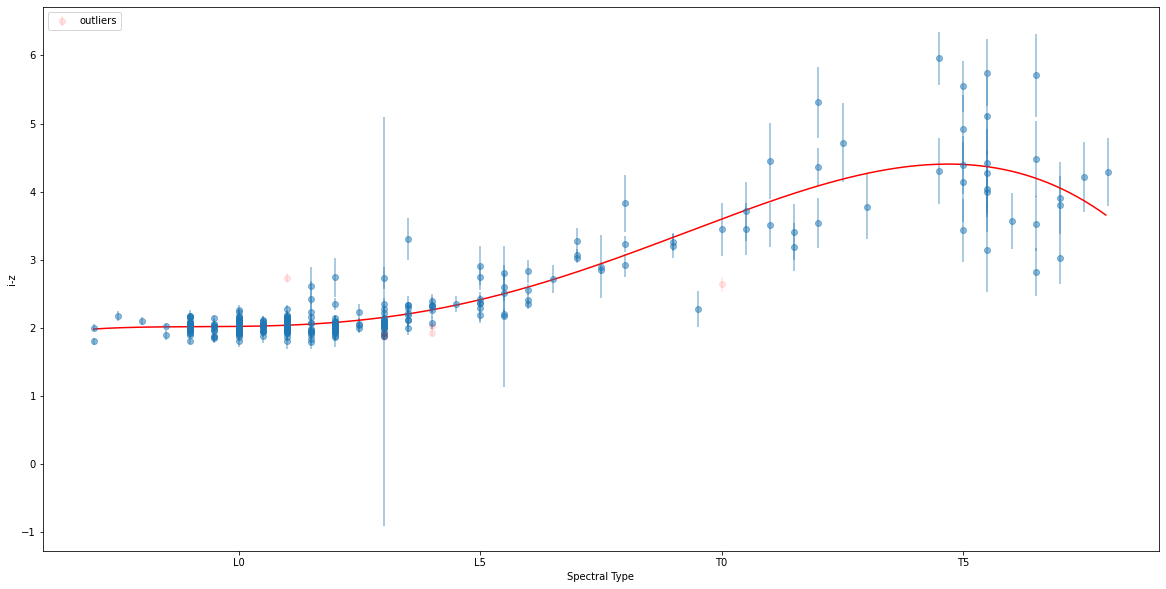

In [201]:
outliers,std = polyfit(dfsel["i-z"],"i-z",dfsel["SpectralTnum"],dfsel["I-Z unc"],5)
#plt.savefig("C:/pythonplot/plot i-z.pdf",bbox_inches="tight",pad_inches=2,transparent=True)
std

1232.8901951810344


1.0131060346134764

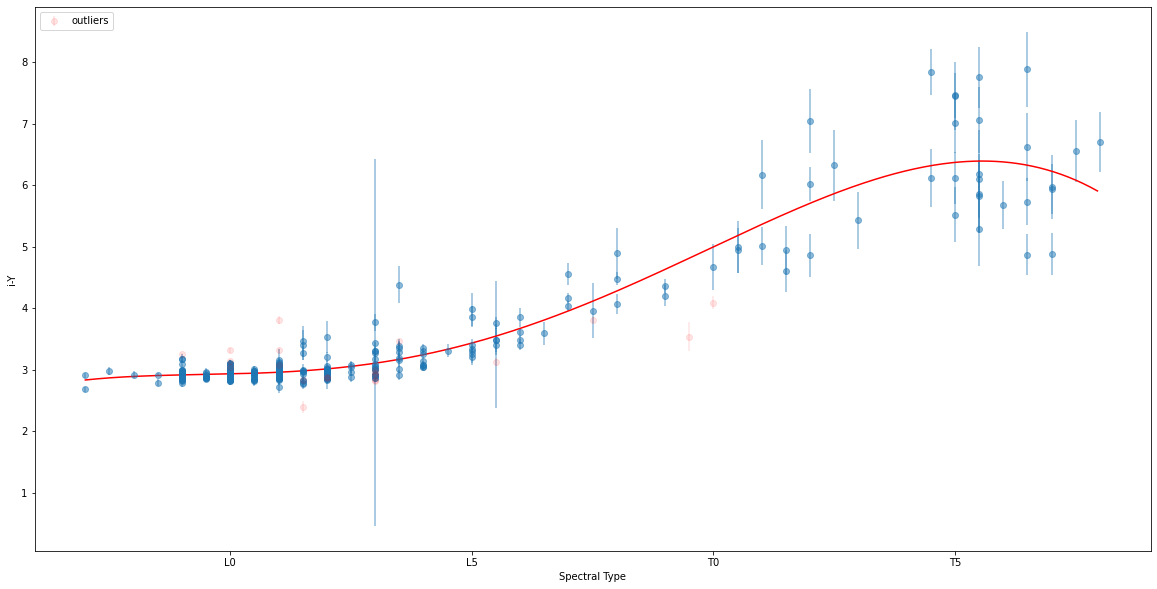

In [202]:
outliers,std= polyfit(dfsel["i-Y"],"i-Y",dfsel["SpectralTnum"],dfsel["I-Y unc"],5)
std
#plt.savefig("C:/pythonplot/plot i-Y.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1419.3315934365507


1.0466623914924555

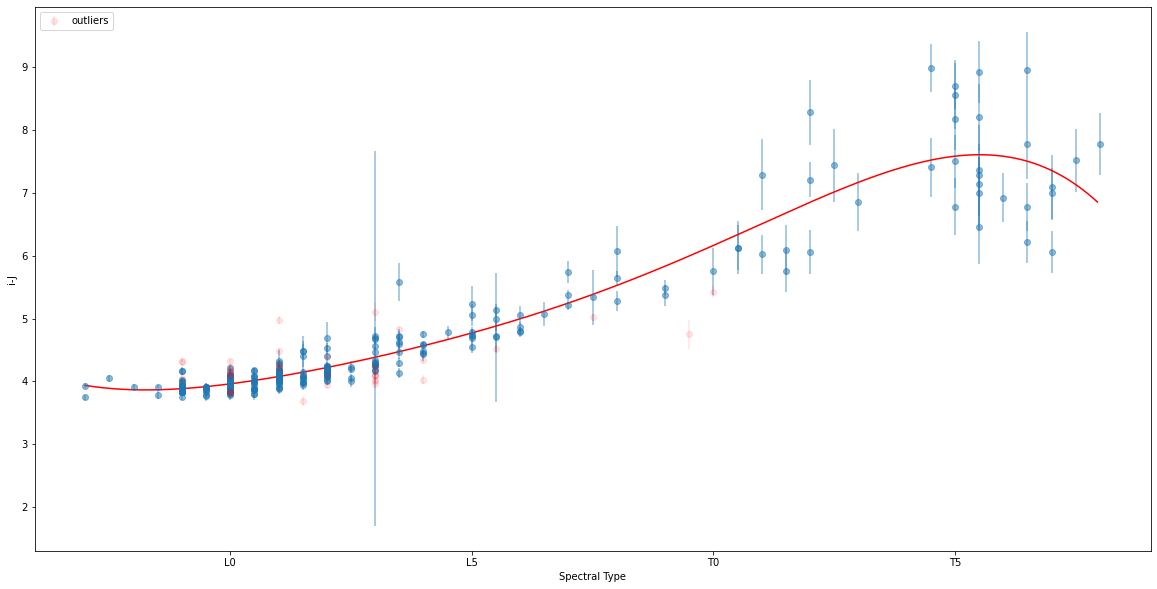

In [203]:
outliers,std = polyfit(dfsel["i-J"],"i-J",dfsel["SpectralTnum"],dfsel["I-J unc"],5)
std
#plt.savefig("C:/pythonplot/plot i-J.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1443.3826300033406


0.8832743541930145

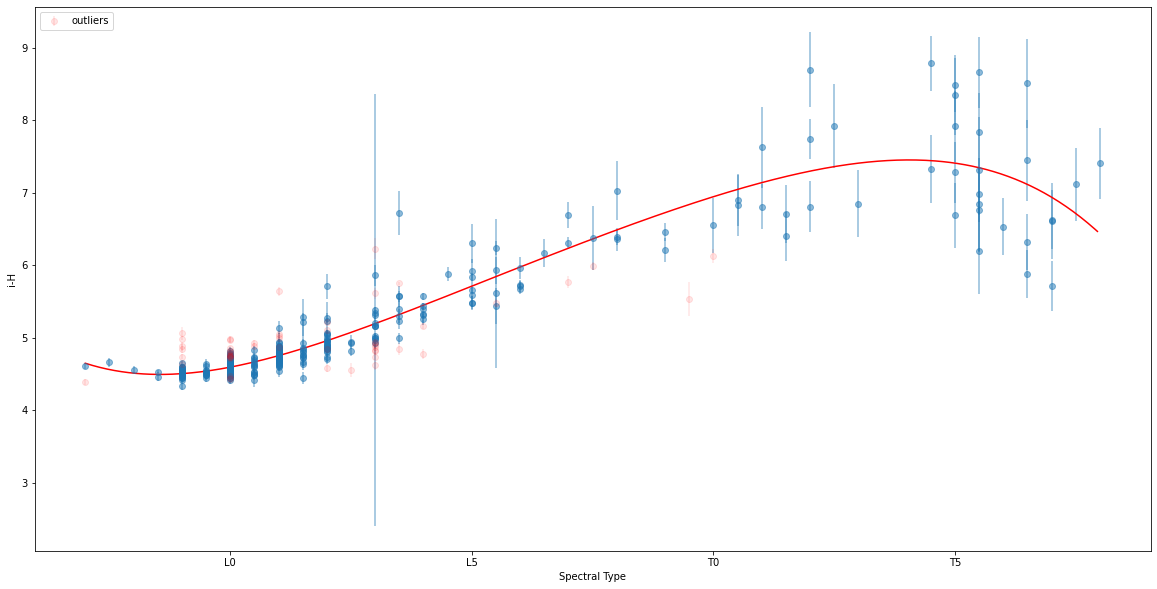

In [204]:
outliers,std = polyfit(dfsel["i-H"],"i-H",dfsel["SpectralTnum"],dfsel["I-H unc"],5)
std
#plt.savefig("C:/pythonplot/plot i-H.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1523.4480107429258


0.7845927750523578

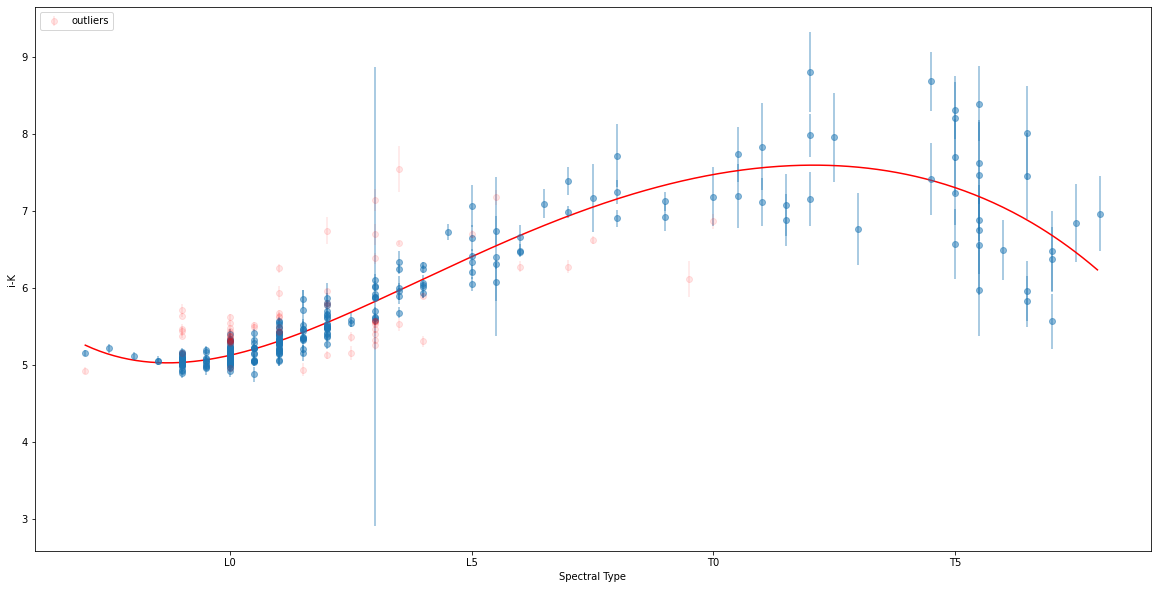

In [205]:
outliers,std = polyfit(dfsel["i-K"],"i-K",dfsel["SpectralTnum"],dfsel["I-K unc"],5)
std
#plt.savefig("C:/pythonplot/plot i-K.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1513.6932592321027


0.9380188921559749

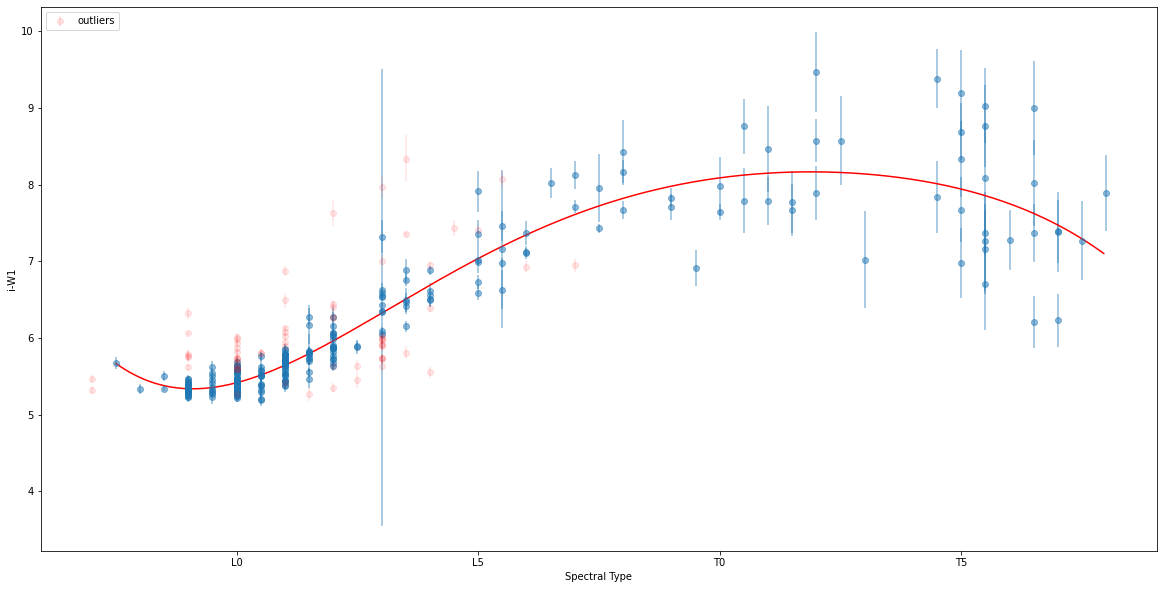

In [206]:
outliers,std= polyfit(dfsel["i-W1"],"i-W1",dfsel["SpectralTnum"],dfsel["I-W1 unc"],5)
std
#plt.savefig("C:/pythonplot/plot i-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1515.2617523444974


1.2668536875152294

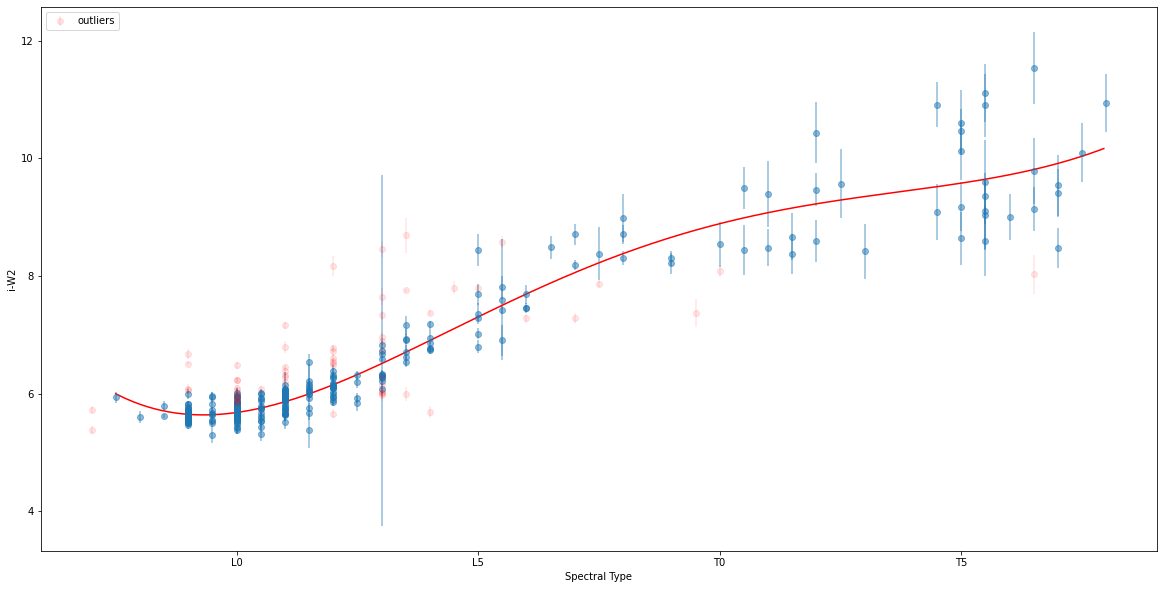

In [207]:
outliers,std= polyfit(dfsel["i-W2"],"i-W2",dfsel["SpectralTnum"],dfsel["I-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot i-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1159.979653270558


0.3295777365494606

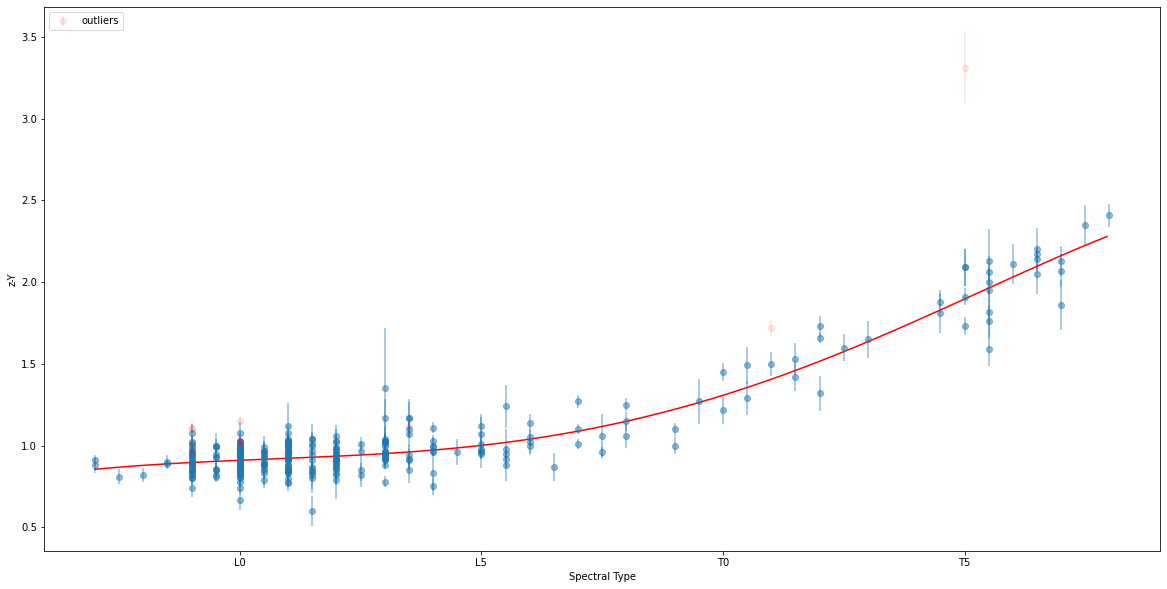

In [208]:
outliers,std = polyfit(dfsel["z-Y"],"z-Y",dfsel["SpectralTnum"],dfsel["Z-Y unc"],5)
std
#plt.savefig("C:/pythonplot/plot z-Y.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1374.0752211804602


0.37335291221419925

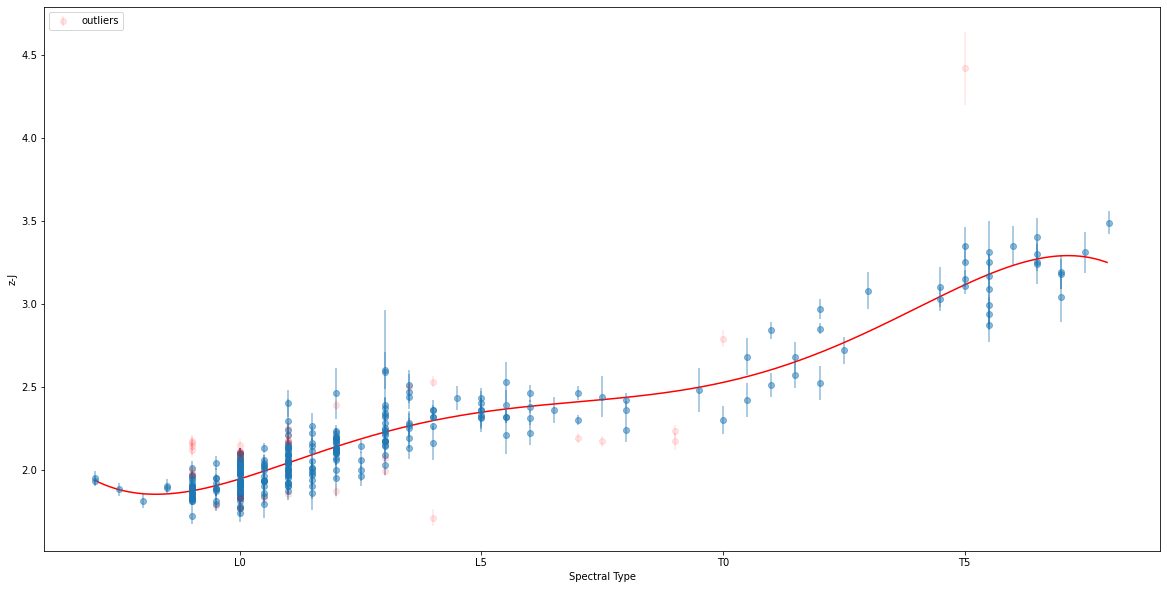

In [209]:
outliers,std = polyfit(dfsel["z-J"],"z-J",dfsel["SpectralTnum"],dfsel["Z-J unc"],5)
std
#plt.savefig("C:/pythonplot/plot z-J.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1360.2323609342416


0.3019508083404307

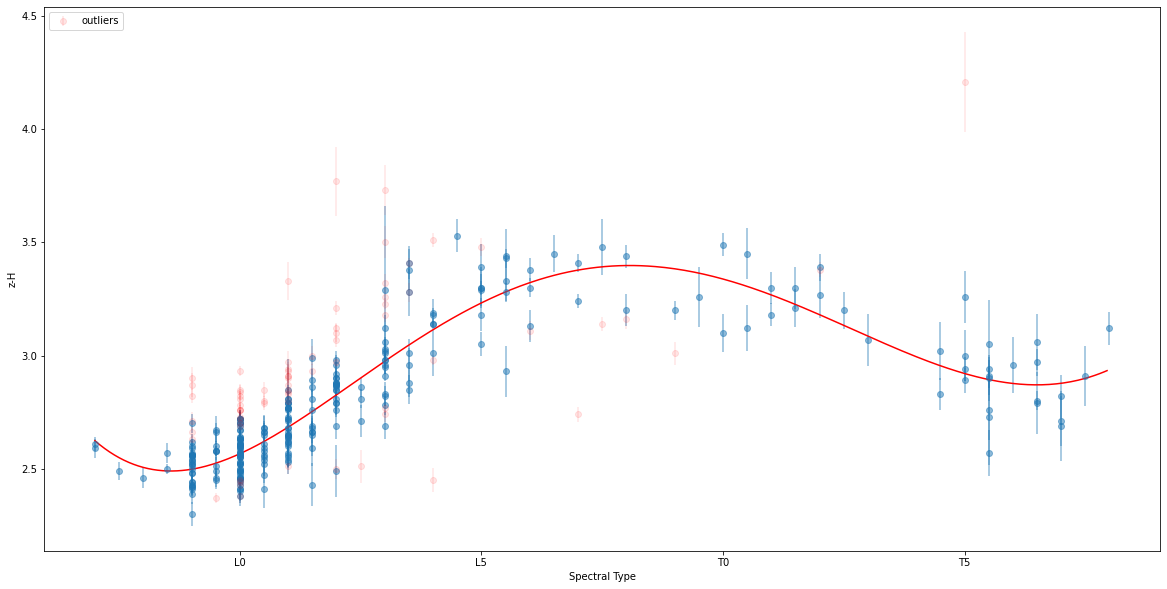

In [210]:
outliers,std = polyfit(dfsel["z-H"],"z-H",dfsel["SpectralTnum"],dfsel["Z-H unc"],5)
std
#plt.savefig("C:/pythonplot/plot z-H.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


1470.1256066537308


0.4001782680178569

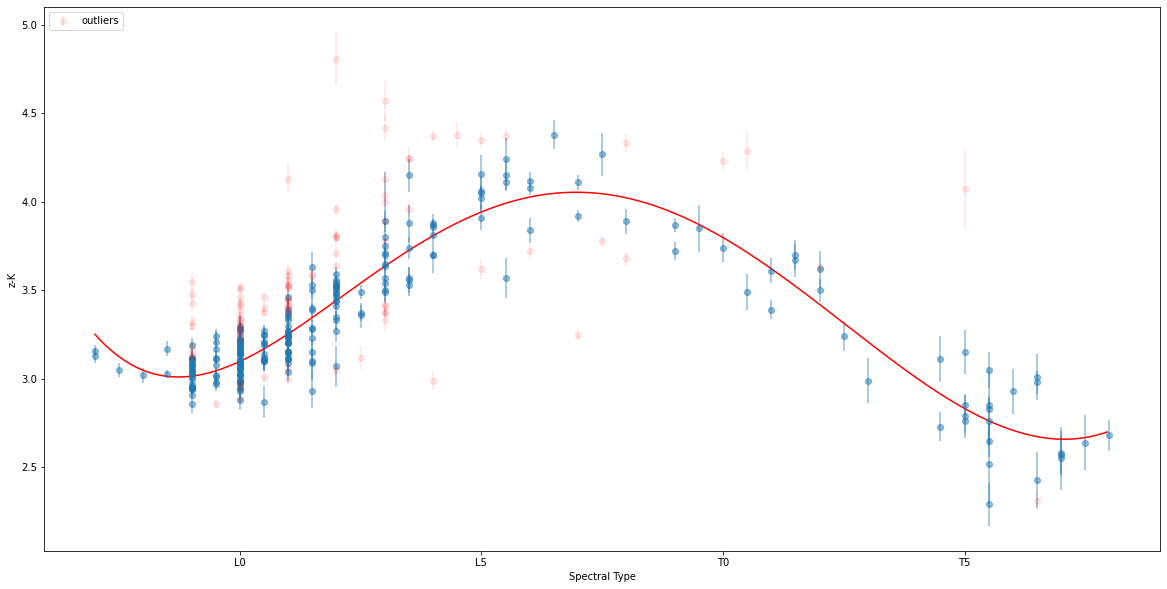

In [211]:
outliers,std = polyfit(dfsel["z-K"],"z-K",dfsel["SpectralTnum"],dfsel["Z-K unc"],5)
std
#plt.savefig("C:/pythonplot/plot z-K.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1559.536976694051


0.5083646511236898

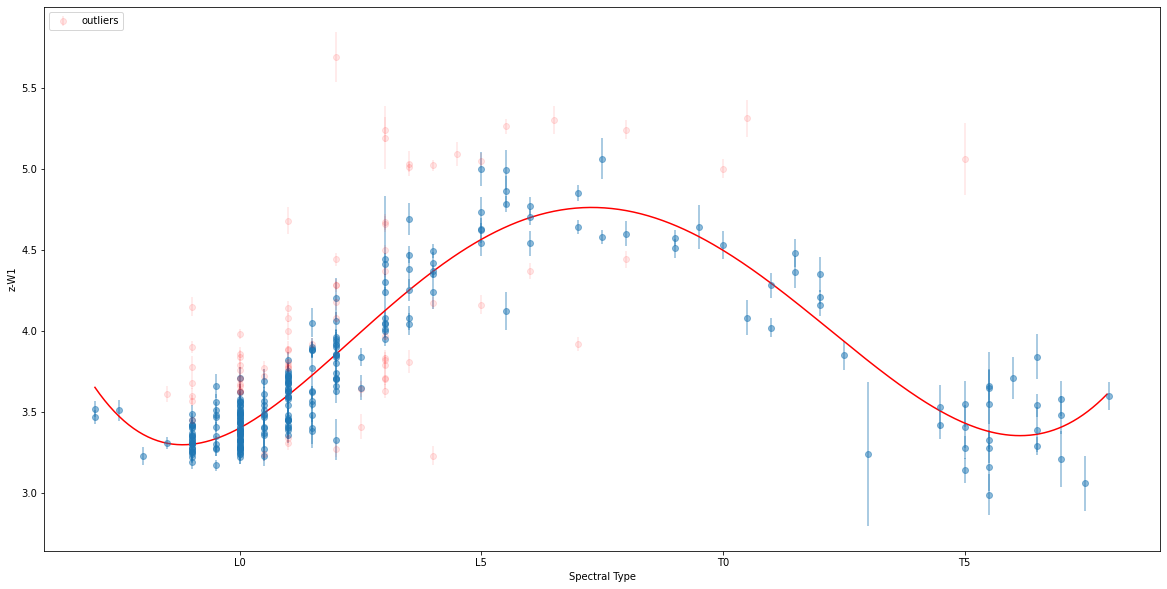

In [212]:
outliers,std = polyfit(dfsel["z-W1"],"z-W1",dfsel["SpectralTnum"],dfsel["Z-W1 unc"],5)
std
#plt.savefig("C:/pythonplot/plot z-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1488.3322361565245


0.6665348724254195

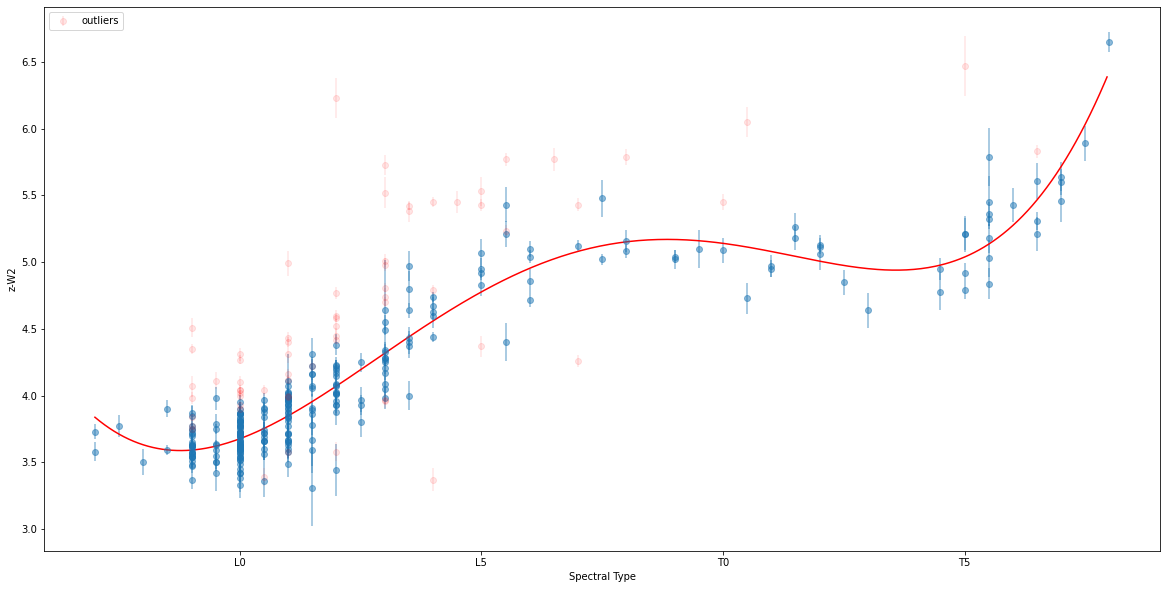

In [213]:
outliers,std = polyfit(dfsel["z-W2"],"z-W2",dfsel["SpectralTnum"],dfsel["Z-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot z-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1626.2428924334135


0.13174283891557936

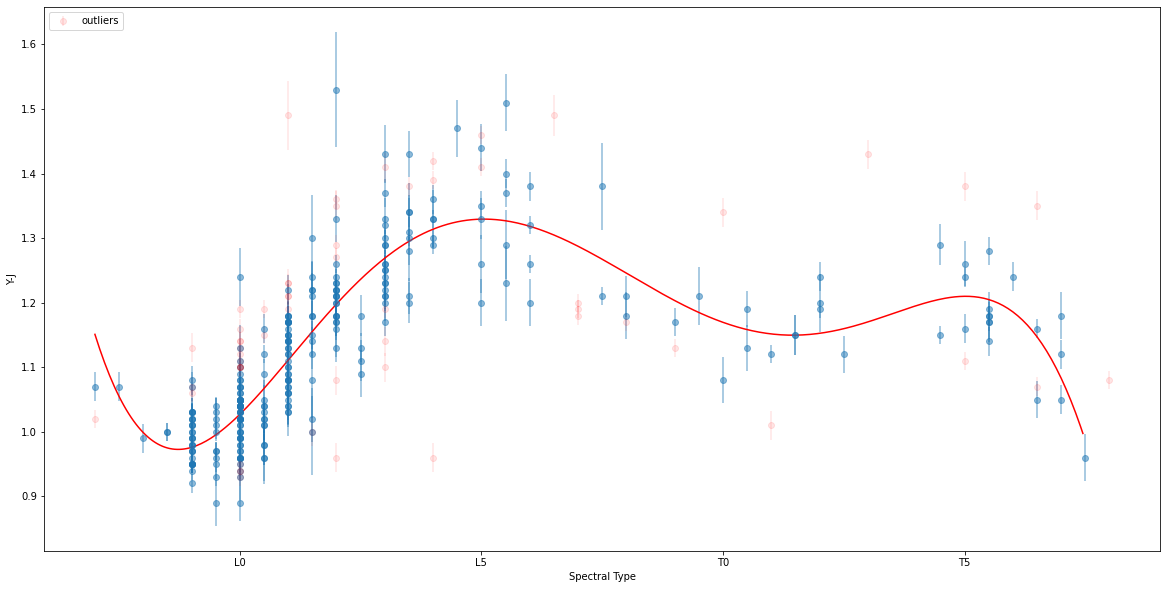

In [214]:
outliers,std = polyfit(dfsel["Y-J"],"Y-J",dfsel["SpectralTnum"],dfsel["Y-J unc"],5)
std
#plt.savefig("C:/pythonplot/plot Y-J.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1369.4931191131184


0.33965043601491374

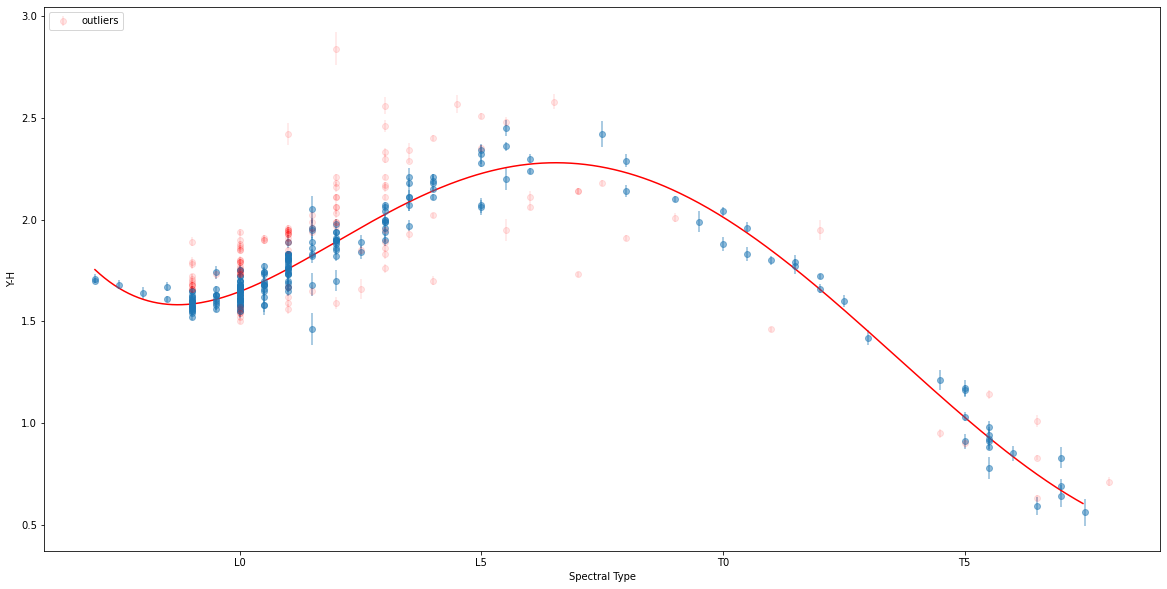

In [215]:
outliers,std = polyfit(dfsel["Y-H"],"Y-H",dfsel["SpectralTnum"],dfsel["Y-H unc"],5)
std
#plt.savefig("C:/pythonplot/plot Y-H.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1217.1551967449097


0.5502858481788193

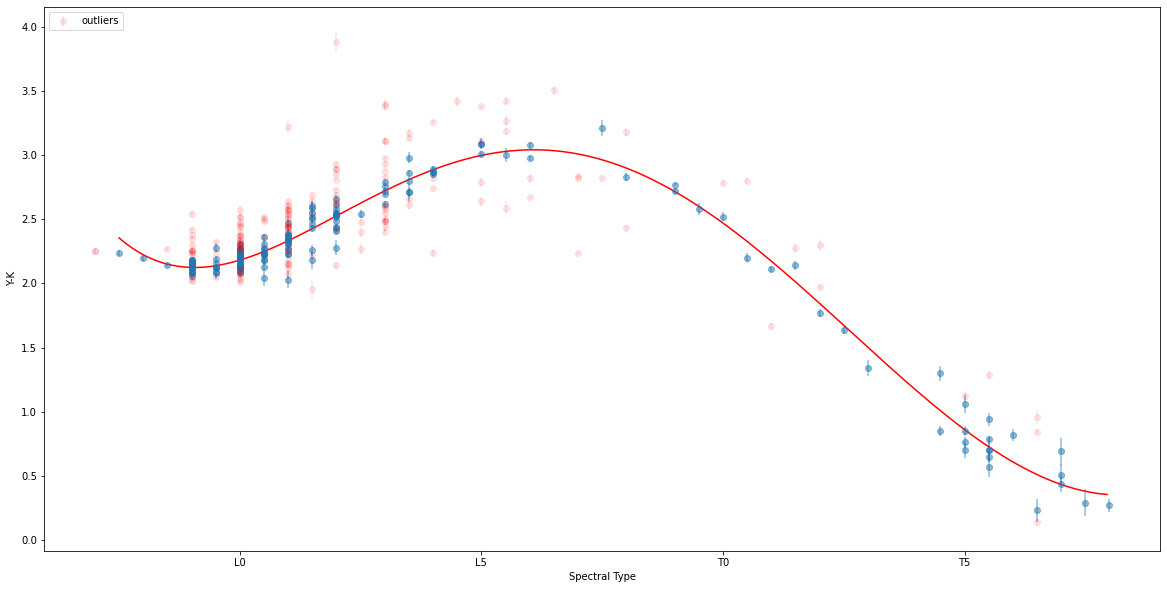

In [216]:
outliers,std = polyfit(dfsel["Y-K"],"Y-K",dfsel["SpectralTnum"],dfsel["Y-K unc"],5)
std
#plt.savefig("C:/pythonplot/plot Y-K.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1385.7511120876832


0.575034865047991

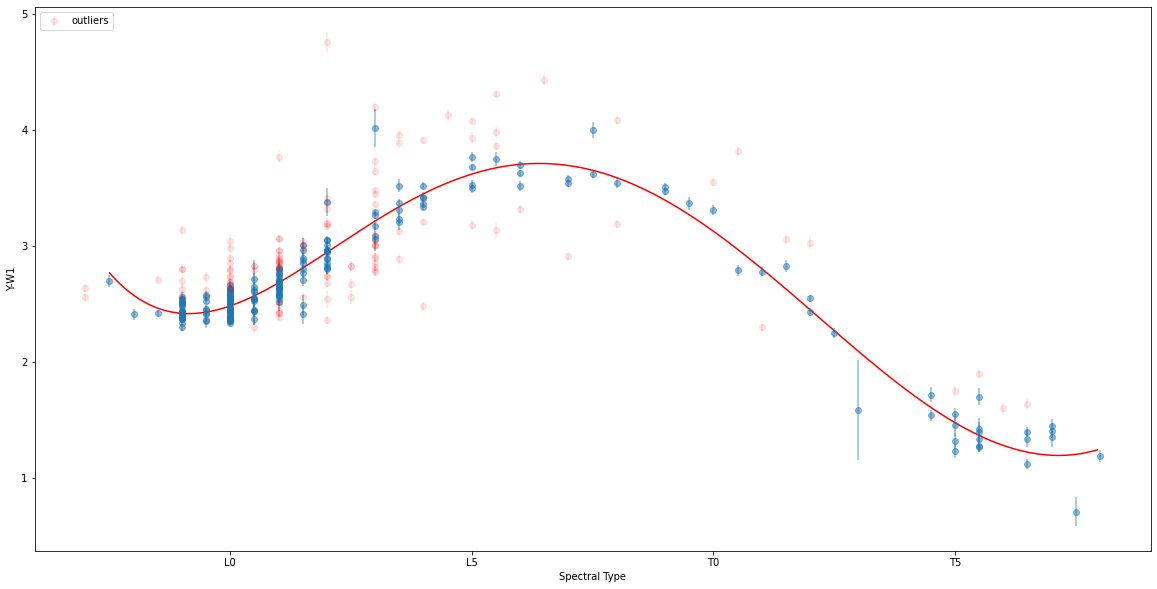

In [217]:
outliers,std = polyfit(dfsel["Y-W1"],"Y-W1",dfsel["SpectralTnum"],dfsel["Y-W1 unc"],5)
std
#plt.savefig("C:/pythonplot/plot Y-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1437.6385149636035


0.49842191362262445

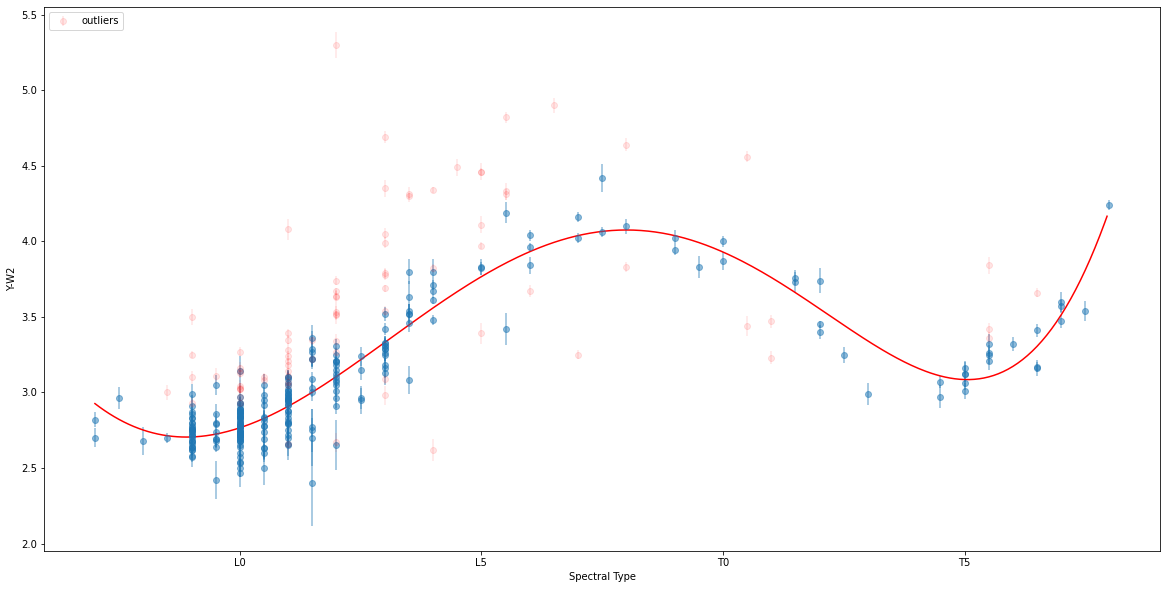

In [218]:
outliers,std = polyfit(dfsel["Y-W2"],"Y-W2",dfsel["SpectralTnum"],dfsel["Y-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot Y-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1511.761067375748


0.2876419026964798

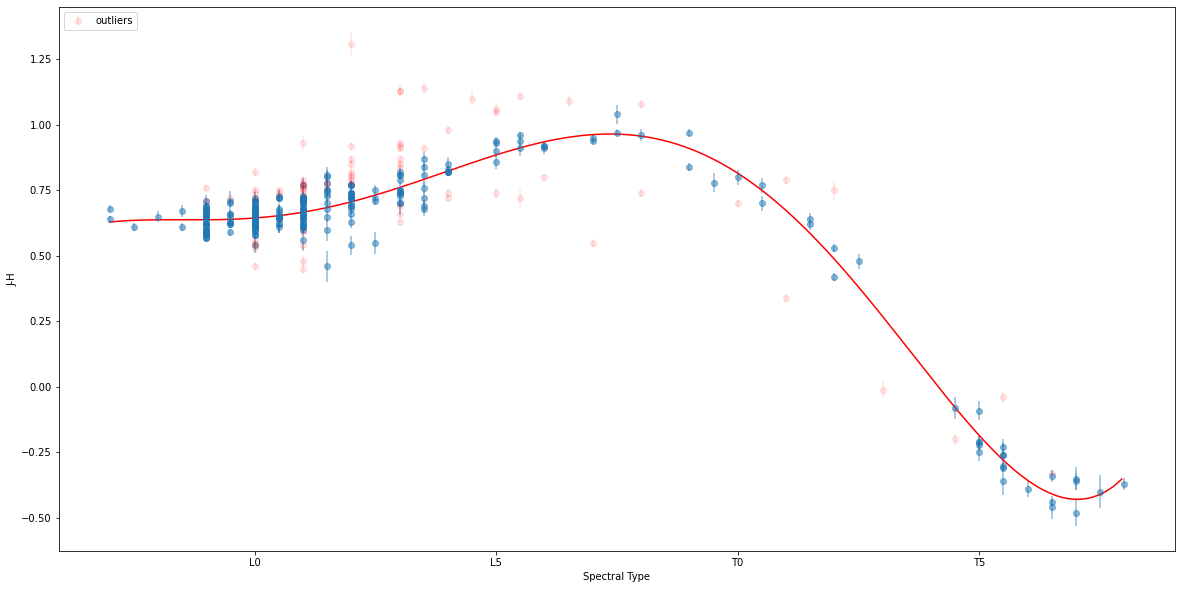

In [219]:
outliers,std = polyfit(dfsel["J-H"],"J-H",dfsel["SpectralTnum"],dfsel["J-H unc"],5)
std
#plt.savefig("C:/pythonplot/plot J-H.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1432.4066116997033


0.507464877677386

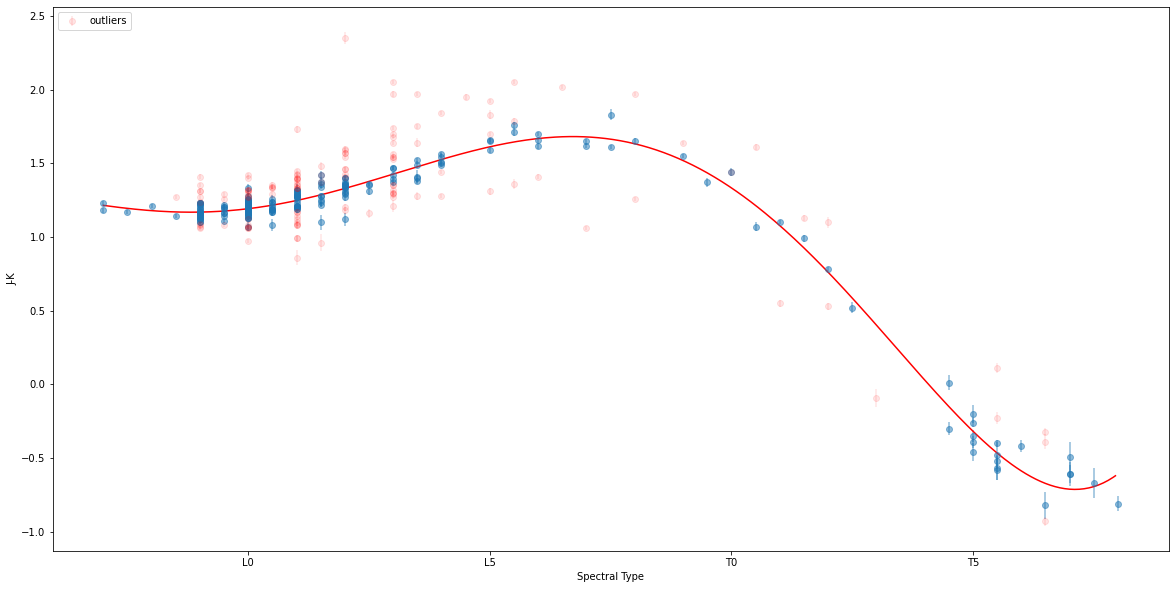

In [220]:
outliers,std = polyfit(dfsel["J-K"],"J-K",dfsel["SpectralTnum"],dfsel["J-K unc"],5)
std
#plt.savefig("C:/pythonplot/plot J-K.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1595.072578884214


0.5100928268869525

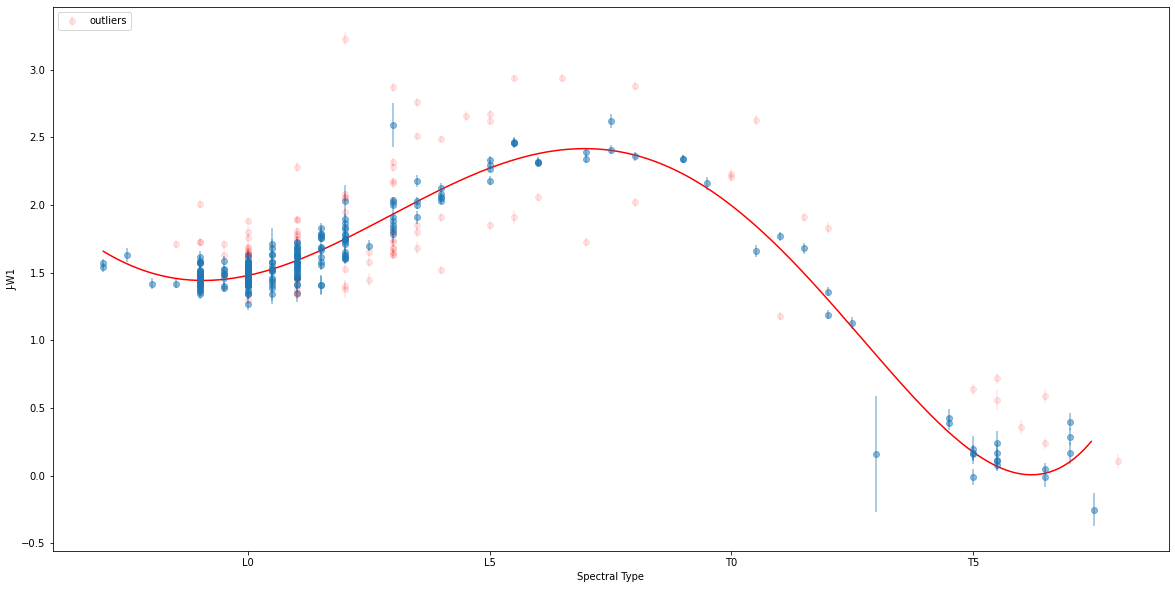

In [221]:
outliers,std = polyfit(dfsel["J-W1"],"J-W1",dfsel["SpectralTnum"],dfsel["J-W1 unc"],5)
std
#plt.savefig("C:/pythonplot/plot J-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1294.2944756158383


0.4032624138132186

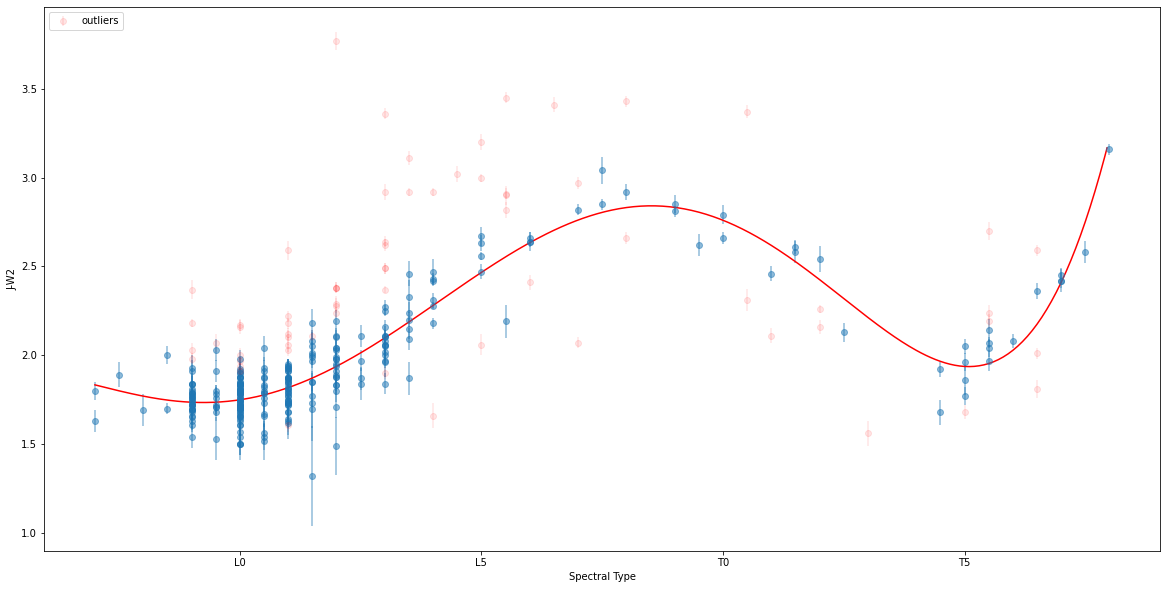

In [222]:
outliers,std = polyfit(dfsel["J-W2"],"J-W2",dfsel["SpectralTnum"],dfsel["J-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot J-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1383.1845232253245


0.22646657559470393

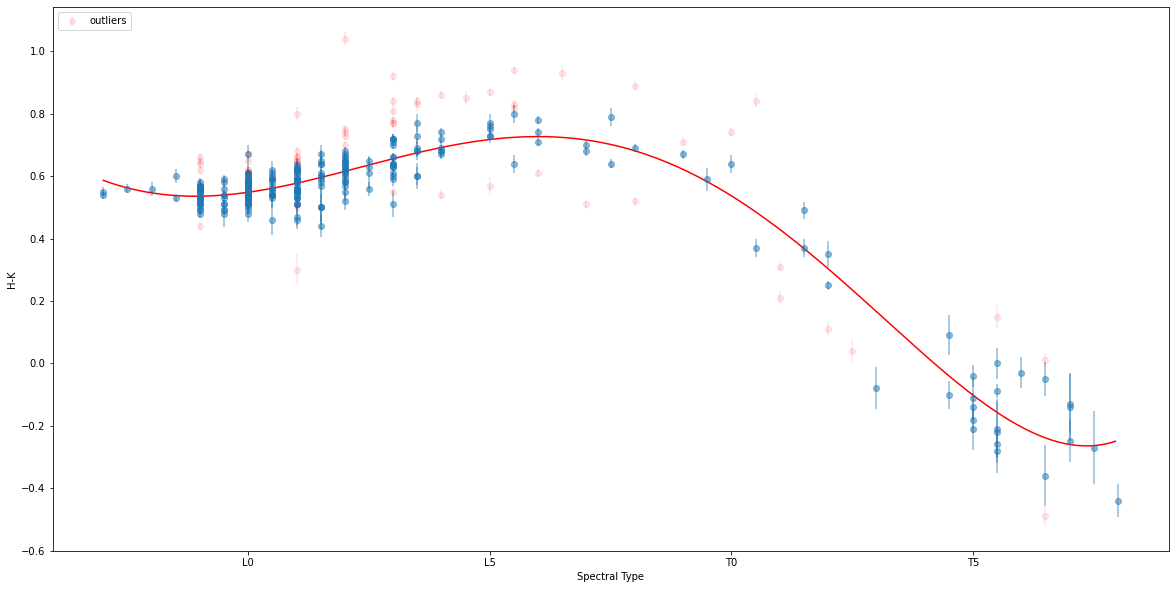

In [223]:
outliers,std = polyfit(dfsel["H-K"],"H-K",dfsel["SpectralTnum"],dfsel["H-K unc"],5)
std
#plt.savefig("C:/pythonplot/plot H-K.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1162.2990468947


0.26470179572008873

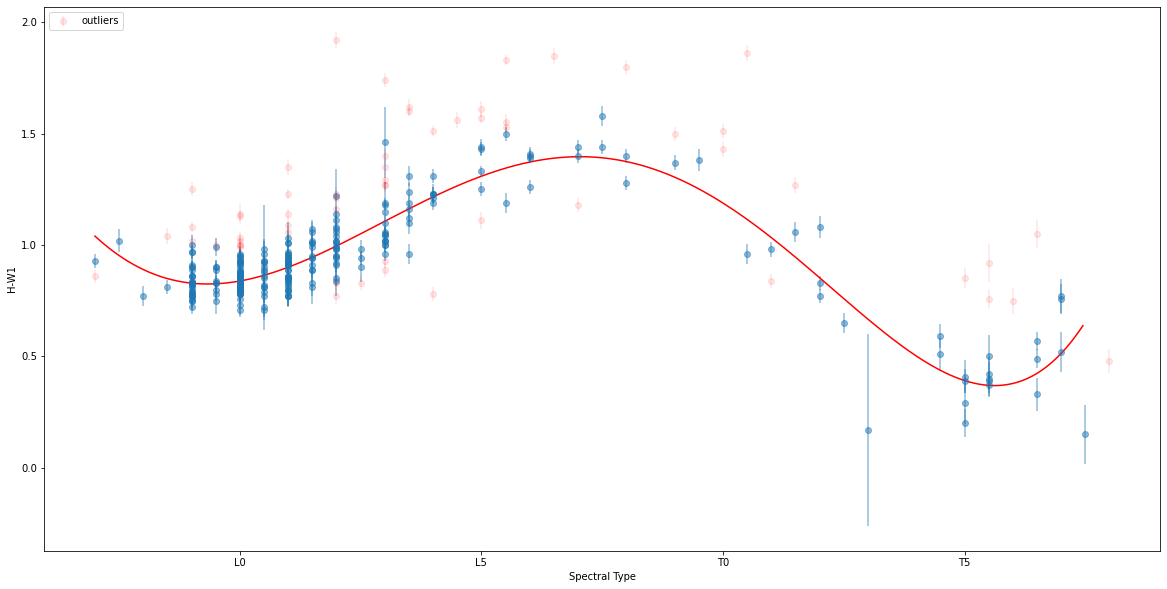

In [224]:
outliers,std = polyfit(dfsel["H-W1"],"H-W1",dfsel["SpectralTnum"],dfsel["H-W1 unc"],5)
std
#plt.savefig("C:/pythonplot/plot H-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1271.9796013984846


0.43563700624610924

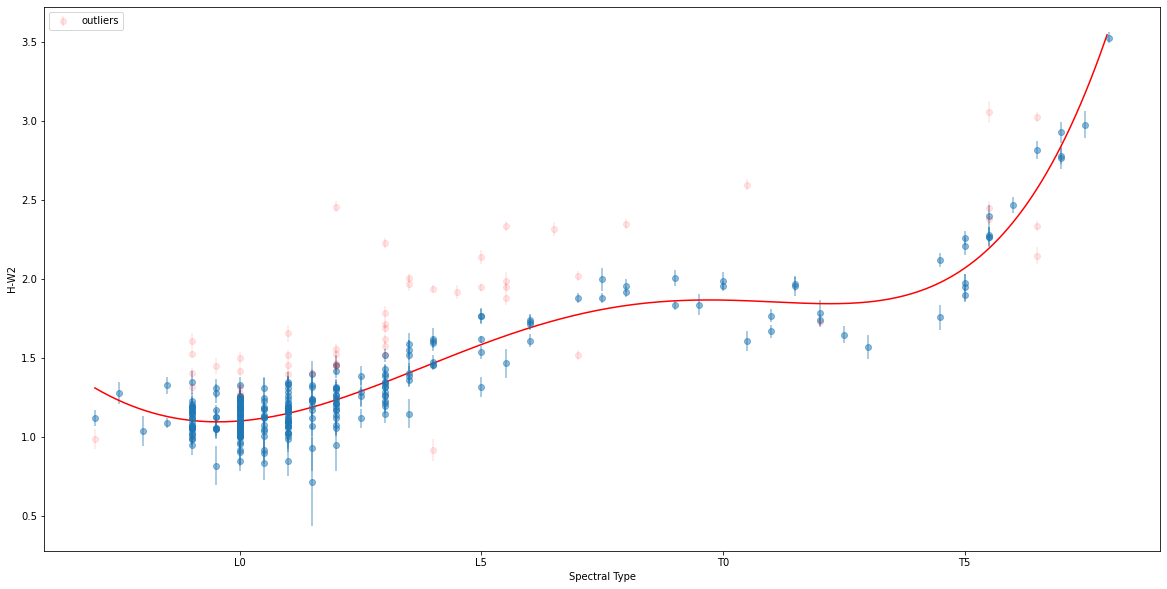

In [225]:
outliers,std = polyfit(dfsel["H-W2"],"H-W2",dfsel["SpectralTnum"],dfsel["H-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot H-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1104.7469071024693


0.18910126175473244

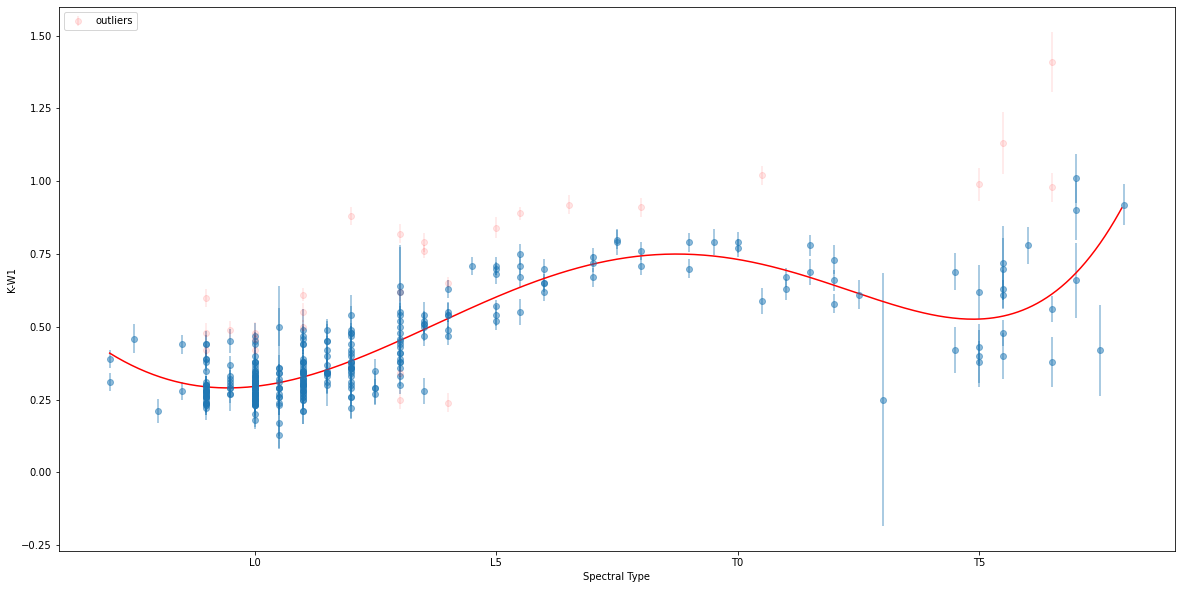

In [226]:
outliers,std = polyfit(dfsel["K-W1"],"K-W1",dfsel["SpectralTnum"],dfsel["K-W1 unc"],5)
std
#plt.savefig("C:/pythonplot/plot K-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

1274.849651882306


0.5729739814258615

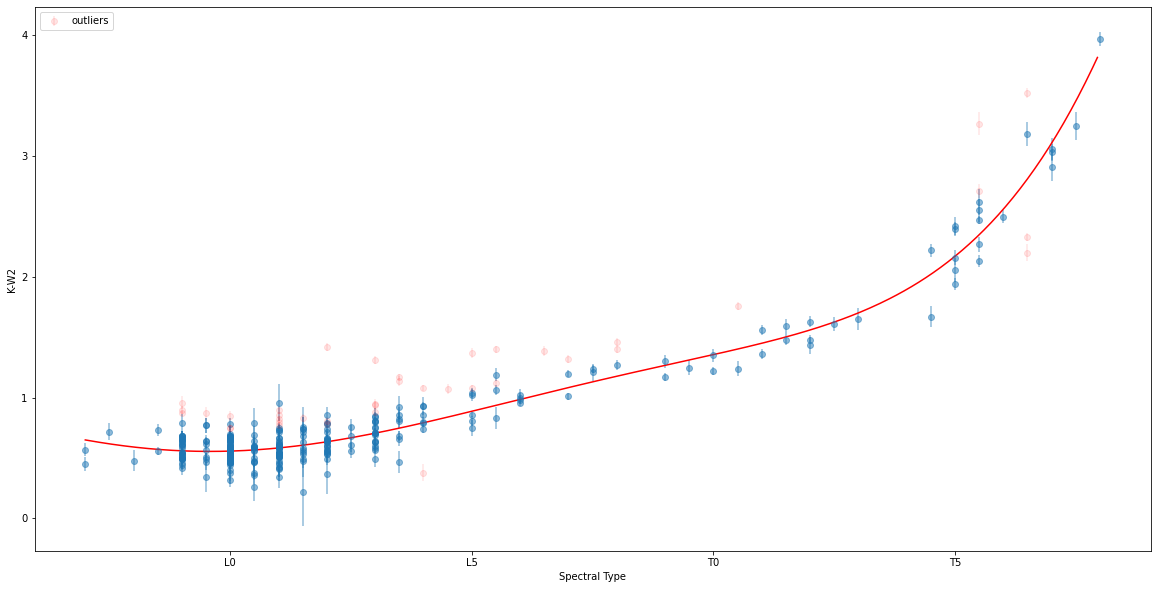

In [227]:
outliers,std = polyfit(dfsel["K-W2"],"K-W2",dfsel["SpectralTnum"],dfsel["K-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot K-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

746.9788808369312


0.451880193571881

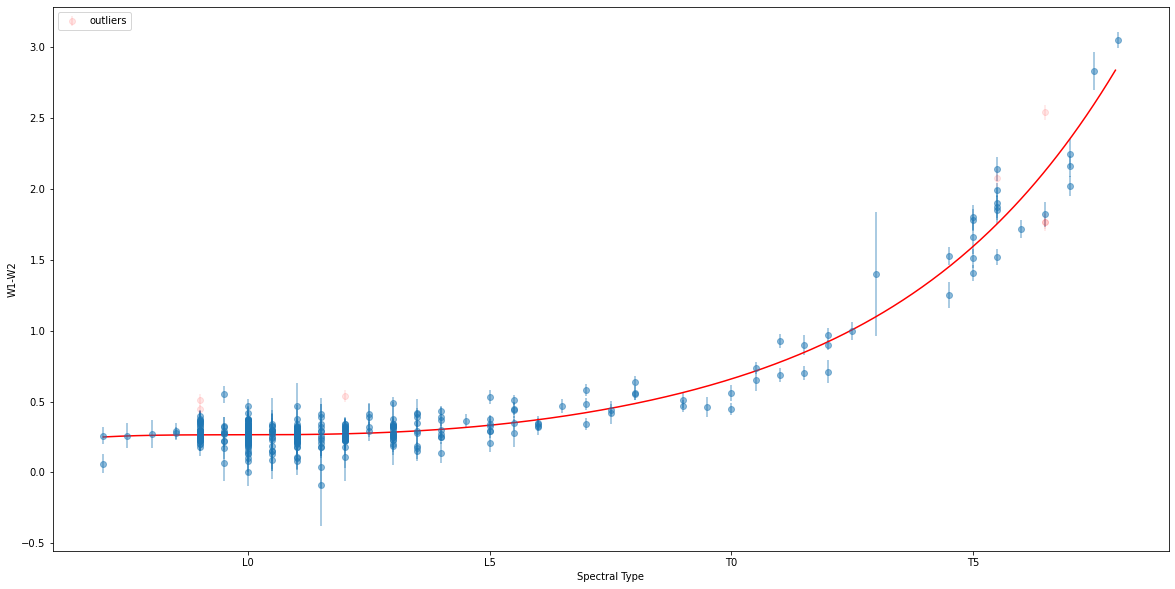

In [228]:
outliers,std = polyfit(dfsel["W1-W2"],"W1-W2",dfsel["SpectralTnum"],dfsel["W1-W2 unc"],5)
std
#plt.savefig("C:/pythonplot/plot W1-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [229]:
#some reformatting 
#let's use numerical labels
def change(i):
    if i==Cata_list[0]:
        i=0
    elif i==Cata_list[1]:
        i=2
    elif i==Cata_list[2]:
        i=2
    elif i==Cata_list[3]:
        i=2
    elif i==Cata_list[4]:
        i=2
    elif i==Cata_list[5]:
        i=2
    elif i==Cata_list[6]:
        i=2
    elif i==Cata_list[7]:
        i=2
    elif i==Cata_list[8]:
        i=2
    elif i==Cata_list[9]:
        i=2
    elif i==Cata_list[10]:
        i=2
    elif i==Cata_list[11]:
        i=2
    elif i==Cata_list[12]:
        i=2
    elif i==Cata_list[13]:
        i=2
    elif i==Cata_list[14]:
        i=2
    elif i==Cata_list[15]:
        i=2
    elif i==Cata_list[16]:
        i=2
    elif i==Cata_list[17]:
        i=2
    elif i==Cata_list[18]:
        i=2
    elif i==Cata_list[19]:
        i=3
    elif i==Cata_list[20]:
        i=3
    elif i==Cata_list[21]:
        i=3
    elif i==Cata_list[22]:
        i=3
    elif i==Cata_list[23]:
        i=3
    elif i == Cata_list[24]:
        i = 3
    elif i == Cata_list[25]:
        i = 3
    elif i == Cata_list[26]:
        i = 3
    elif i == Cata_list[27]:
        i = 3
    elif i == Cata_list[28]:
        i = 1
    elif i == Cata_list[29]:
        i = 1
    elif i == Cata_list[30]:
        i = 1
    elif i == Cata_list[31]:
        i = 1
    elif i == Cata_list[32]:
        i = 1
    elif i == Cata_list[33]:
        i = 1
    elif i == Cata_list[34]:
        i = 1
    elif i == Cata_list[35]:
        i = 1
    elif i == Cata_list[36]:
        i = 1
    elif i == Cata_list[37]:
        i = 4
    elif i == Cata_list[38]:
        i = 4
    elif i == Cata_list[39]:
        i = 4
    elif i == Cata_list[40]:
        i = 5
    elif i == Cata_list[41]:
        i = 4
    elif i == Cata_list[42]:
        i = 4
    elif i == Cata_list[43]:
        i = 4
    elif i == Cata_list[44]:
        i = 4
    elif i == Cata_list[45]:
        i = 4
    elif i == Cata_list[46]:
        i = 5
    elif i == Cata_list[47]:
        i = 5
    elif i == Cata_list[48]:
        i = 5
    elif i == Cata_list[49]:
        i = 5
    elif i == Cata_list[50]:
        i = 5
    elif i == Cata_list[51]:
        i = 5
    elif i == Cata_list[52]:
        i = 5
    elif i == Cata_list[53]:
        i = 5

    return i



In [230]:
#make a grouping
SpT_num = []
data2=dfsel.groupby(by='SpType')
Cata_list=list(data2.groups.keys())
print(Cata_list)
b=0
for a in Cata_list:
    b=b+1
print(b)


for i in Cata_list:
    dfsel.loc[dfsel['SpType'].isin([i]),'SpType']=change(i)
print(dfsel['SpType'])

SpT_num=dfsel['SpType']
SpT_num

['L0     ', 'L0.5   ', 'L0.5:  ', 'L0:    ', 'L1     ', 'L1.5   ', 'L1.5:  ', 'L1:    ', 'L2     ', 'L2.5   ', 'L2.5:  ', 'L2:    ', 'L3     ', 'L3.5   ', 'L3:    ', 'L4     ', 'L4.5   ', 'L4:    ', 'L5     ', 'L5.5   ', 'L6     ', 'L6.5   ', 'L7     ', 'L7.5   ', 'L8     ', 'L9     ', 'L9.5   ', 'M7     ', 'M7.5:  ', 'M8     ', 'M8.5   ', 'M8.5:  ', 'M9     ', 'M9.5   ', 'M9.5:  ', 'M9:    ', 'T0     ', 'T0.5   ', 'T1     ', 'T1+T4  ', 'T1.5   ', 'T2     ', 'T2.5   ', 'T3     ', 'T4.5   ', 'T5     ', 'T5.5   ', 'T6     ', 'T6.5   ', 'T7     ', 'T7.5   ', 'T8     ']
52
2       2
7       2
11      2
23      3
31      2
       ..
1343    1
1345    2
1349    2
1355    5
1358    2
Name: SpType, Length: 340, dtype: object


2       2
7       2
11      2
23      3
31      2
       ..
1343    1
1345    2
1349    2
1355    5
1358    2
Name: SpType, Length: 340, dtype: object

In [231]:
dfsel["SpSubT"] = SpT_num

In [232]:
dfsel[dfsel["SpSubT"].notna()==True]

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc,SpSubT
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284,2
7,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,0.028284,0.036056,0.063246,0.028284,0.036056,0.063246,0.036056,0.063246,0.067082,2
11,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,0.014142,0.031623,0.041231,0.014142,0.031623,0.041231,0.031623,0.041231,0.050000,2
23,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,0.014142,0.031623,0.031623,0.014142,0.031623,0.031623,0.031623,0.031623,0.042426,3
31,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,0.042426,0.058310,0.104403,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,J234539.07+005513.5,17.63,0.02,15.65,0.01,14.63,0.01,13.68,0.01,13.09,...,0.014142,0.031623,0.022361,0.014142,0.031623,0.022361,0.031623,0.022361,0.036056,1
1345,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,0.050000,0.076158,0.281603,0.050000,0.076158,0.281603,0.080623,0.282843,0.288617,2
1349,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489,2
1355,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,0.041231,0.050990,0.041231,0.050000,0.058310,0.050000,0.064031,0.056569,0.064031,5


In [233]:
dfsel.dtypes

ULAS          object
imag         float64
e_imag       float64
zmag         float64
e_zmag       float64
              ...   
H-W2 unc     float64
K-W1 unc     float64
K-W2 unc     float64
W1-W2 unc    float64
SpSubT        object
Length: 82, dtype: object

In [234]:
#change to numerical
dfsel["SpSubT"] = pd.to_numeric(dfsel["SpSubT"],errors="coerce")

In [235]:
dfsel["SpSubT"].dtypes

dtype('int64')

In [236]:
dfsel["SpSubT"].loc[2]

2

In [237]:
print(dfsel["SpSubT"].value_counts())

2    175
0     55
1     52
3     23
5     19
4     16
Name: SpSubT, dtype: int64


In [238]:
#drop the 0 type (M0-M4.5)
dfsel=dfsel.loc[dfsel["SpSubT"]!=0]
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc,SpSubT
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284,2
7,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,0.028284,0.036056,0.063246,0.028284,0.036056,0.063246,0.036056,0.063246,0.067082,2
11,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,0.014142,0.031623,0.041231,0.014142,0.031623,0.041231,0.031623,0.041231,0.050000,2
23,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,0.014142,0.031623,0.031623,0.014142,0.031623,0.031623,0.031623,0.031623,0.042426,3
31,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,0.042426,0.058310,0.104403,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,J234539.07+005513.5,17.63,0.02,15.65,0.01,14.63,0.01,13.68,0.01,13.09,...,0.014142,0.031623,0.022361,0.014142,0.031623,0.022361,0.031623,0.022361,0.036056,1
1345,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,0.050000,0.076158,0.281603,0.050000,0.076158,0.281603,0.080623,0.282843,0.288617,2
1349,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489,2
1355,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,0.041231,0.050990,0.041231,0.050000,0.058310,0.050000,0.064031,0.056569,0.064031,5


In [239]:
#drop the 1 type (M0-M4.5)
dfsel=dfsel.loc[dfsel["SpSubT"]!=1]
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc,SpSubT
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284,2
7,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,0.028284,0.036056,0.063246,0.028284,0.036056,0.063246,0.036056,0.063246,0.067082,2
11,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,0.014142,0.031623,0.041231,0.014142,0.031623,0.041231,0.031623,0.041231,0.050000,2
23,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,0.014142,0.031623,0.031623,0.014142,0.031623,0.031623,0.031623,0.031623,0.042426,3
31,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,0.042426,0.058310,0.104403,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,J234406.91+011515.8,20.37,0.04,18.45,0.04,17.53,0.02,16.36,0.01,15.63,...,0.014142,0.031623,0.080623,0.022361,0.036056,0.082462,0.031623,0.080623,0.085440,2
1345,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,0.050000,0.076158,0.281603,0.050000,0.076158,0.281603,0.080623,0.282843,0.288617,2
1349,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489,2
1355,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,0.041231,0.050990,0.041231,0.050000,0.058310,0.050000,0.064031,0.056569,0.064031,5


In [240]:
dfsel.to_csv('original dataset with missing data and Mtype dropped.csv',index=False)

In [364]:
from sklearn.model_selection import train_test_split
RSEED = 40 

#remove 
feats = list(dfsel.columns)
feats.remove('ULAS')
feats.remove('imag')
feats.remove('e_imag')
feats.remove('zmag')
feats.remove('e_zmag')
feats.remove('Ymag')
feats.remove('e_Ymag')
feats.remove('Jmag')
feats.remove('e_Jmag')
feats.remove('Hmag')
feats.remove('e_Hmag')
feats.remove('Kmag')
feats.remove('e_Kmag')
feats.remove('W1mag')
feats.remove('e_W1mag')
feats.remove('W2mag')
feats.remove('e_W2mag')
feats.remove('chi2')
feats.remove('Ref')
feats.remove('Simbad')
feats.remove('_RA')
feats.remove('_DE')
feats.remove('PhType')
feats.remove('SpType')
feats.remove('SpectralTnum')
feats.remove('I-Z unc')
feats.remove('I-Y unc')
feats.remove('I-J unc')
feats.remove('I-H unc')
feats.remove('I-K unc')
feats.remove('I-W1 unc')
feats.remove('I-W2 unc')
feats.remove('Z-Y unc')
feats.remove('Z-J unc')
feats.remove('Z-H unc')
feats.remove('Z-K unc')
feats.remove('Z-W1 unc')
feats.remove('Z-W2 unc')
feats.remove('Y-J unc')
feats.remove('Y-H unc')
feats.remove('Y-K unc')
feats.remove('Y-W1 unc')
feats.remove('Y-W2 unc')
feats.remove('J-H unc')
feats.remove('J-K unc')
feats.remove('J-W1 unc')
feats.remove('J-W2 unc')
feats.remove('H-K unc')
feats.remove('H-W1 unc')
feats.remove('H-W2 unc')
feats.remove('K-W1 unc')
feats.remove('K-W2 unc')
feats.remove('W1-W2 unc')
feats.remove('SpSubT')

X0 = np.array(dfsel[feats])
y0 = np.array(dfsel["SpSubT"])

X, X_test, y, y_test = train_test_split(X0,y0,train_size=0.85, random_state=RSEED, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=RSEED, train_size=0.90, shuffle=True)

In [365]:
feats

['i-z',
 'i-Y',
 'i-J',
 'i-H',
 'i-K',
 'i-W1',
 'i-W2',
 'z-Y',
 'z-J',
 'z-H',
 'z-K',
 'z-W1',
 'z-W2',
 'Y-J',
 'Y-H',
 'Y-K',
 'Y-W1',
 'Y-W2',
 'J-H',
 'J-K',
 'J-W1',
 'J-W2',
 'H-K',
 'H-W1',
 'H-W2',
 'K-W1',
 'K-W2',
 'W1-W2']

In [366]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [434]:
    RF1 = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators = 30,max_depth=None)

    RF1.fit(X_train, y_train)
    train_preds = RF1.predict(X_train)
    test_preds = RF1.predict(X_test)

    print("The raw features produce a model with accuracy ~{:.4f} !".format(accuracy_score(y_test, test_preds)))
   
    precision, recall, F1, _ = precision_recall_fscore_support(y_test, test_preds,average='weighted')

    print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))

The raw features produce a model with accuracy ~0.9714 !
precision: 0.98. recall: 0.97, F1: 0.97


In [435]:
len(X_train), len(X_val), len(X_test)

(178, 20, 35)

In [436]:
confusion_matrix(y_test, test_preds)

array([[23,  0,  0,  0],
       [ 0,  3,  0,  0],
       [ 0,  0,  4,  0],
       [ 0,  1,  0,  4]], dtype=int64)

[[23  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  1  0  4]]
97.14285714285714 % of accuracy


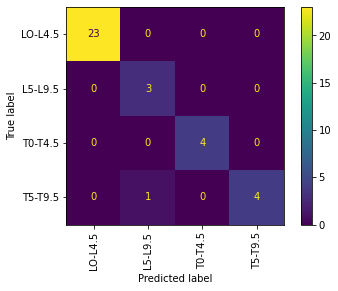

In [437]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_preds)
rsq = accuracy_score(y_test, test_preds)
print(cm)
print(rsq*100,'% of accuracy')

ConfusionMatrixDisplay(cm).plot()
plt.xticks([0, 1, 2, 3], ['LO-L4.5', 'L5-L9.5', 'T0-T4.5','T5-T9.5'],rotation=90)
plt.yticks([0, 1, 2, 3], ['LO-L4.5', 'L5-L9.5', 'T0-T4.5','T5-T9.5'],rotation=0)
plt.savefig("C:/pythonplot/plot/Confusion matrix classifier1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [439]:
RF1.feature_importances_ 

array([0.06139507, 0.08546355, 0.07654405, 0.06552152, 0.00954673,
       0.02373578, 0.06214045, 0.01952747, 0.04416129, 0.0130349 ,
       0.02459396, 0.00774779, 0.02591415, 0.00919079, 0.02777023,
       0.04324735, 0.01584326, 0.00992249, 0.04533202, 0.02432484,
       0.01785992, 0.00887397, 0.00282719, 0.01684698, 0.03875483,
       0.0337053 , 0.06112852, 0.1250456 ])

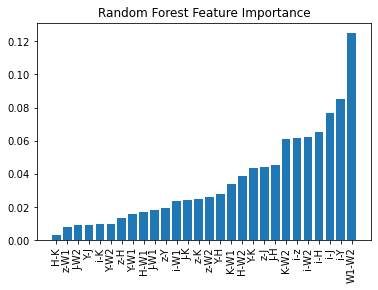

In [441]:
fig, ax=plt.subplots()

tree_feature_importances = (
    RF1.feature_importances_)
    
sorted_idx = tree_feature_importances.argsort()

x_ticks = np.arange(0, len(feats))
ax.bar(x_ticks, tree_feature_importances[sorted_idx])
ax.set_xticklabels(np.array(feats)[sorted_idx], rotation='vertical')
ax.set_xticks(x_ticks)
ax.set_title("Random Forest Feature Importance")
plt.savefig("C:/pythonplot/plot/Feature importance classifier.png",bbox_inches="tight",pad_inches=2,transparent=True)

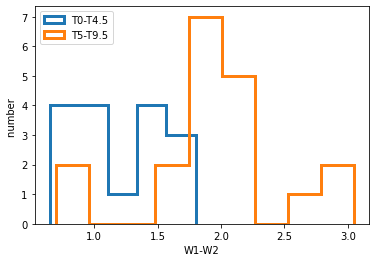

In [191]:
#let's look at the distribution of the most important feature
fig, ax=plt.subplots()
h=plt.hist(dfsel['W1-W2'][dfsel["SpSubT"]==4], bins='auto',\
           histtype='step', label='T0-T4.5', lw=3)
h=plt.hist(dfsel['W1-W2'][dfsel["SpSubT"]==5], bins='auto', \
           histtype='step', label='T5-T9.5', lw=3 )
ax.set(xlabel='W1-W2', ylabel='number ')
ax.legend(loc='upper left')
plt.savefig("C:/pythonplot/plot Distribution important feature.png",bbox_inches="tight",pad_inches=2,transparent=True)

In [192]:
y_pred = RF1.predict(X_test)

In [193]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,5,5
1,3,3
2,2,2
3,3,3
4,2,2
5,5,5
6,5,5
7,2,2
8,2,2
9,2,2


In [194]:
df["diference"]=df["Actual"]-df["Predicted"]
df

,Actual,Predicted,diference
0,5,5,0
1,3,3,0
2,2,2,0
3,3,3,0
4,2,2,0
5,5,5,0
6,5,5,0
7,2,2,0
8,2,2,0
9,2,2,0


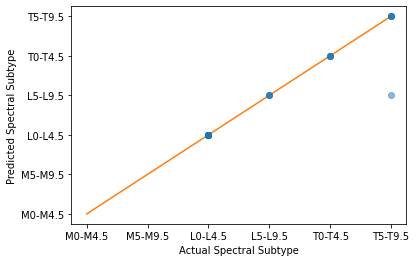

In [204]:
fig, ax=plt.subplots()
ax.errorbar(y_test, test_preds, fmt='o', alpha=0.5)
ax.set(xlabel='Actual Spectral Subtype', ylabel='Predicted Spectral Subtype')

plt.xticks([0, 1, 2, 3,4, 5], ['M0-M4.5', 'M5-M9.5', 'L0-L4.5', 'L5-L9.5','T0-T4.5','T5-T9.5'],rotation=0)
plt.yticks([0, 1, 2, 3,4, 5], ['M0-M4.5', 'M5-M9.5', 'L0-L4.5', 'L5-L9.5','T0-T4.5','T5-T9.5'],rotation=0)
x = np.linspace(0,5,10)
y=x
ax.plot(x, y)
plt.savefig("C:/pythonplot/plot/ActualVsPredictedclassifer1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

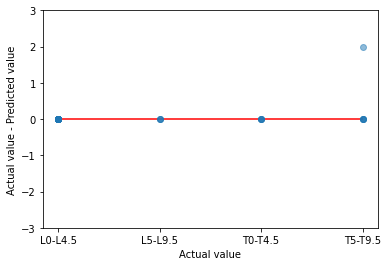

In [208]:
#fig, ax=plt.subplots()
plt.errorbar(y_test, df["diference"], fmt='o', alpha=0.5)
plt.xlabel('Actual value')
plt.ylabel('Actual value - Predicted value')
plt.hlines(y=0,xmin=min(y_test),xmax=max(y_test),colors="red")
plt.ylim(min(df["diference"])-3,max(df["diference"])+1)
plt.xticks([ 2, 3,4, 5], ['L0-L4.5', 'L5-L9.5','T0-T4.5','T5-T9.5'],rotation=0)
plt.savefig("C:/pythonplot/plot/ActualVsPredicteddiferrenceclassifier1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [151]:
#import pickle 
#with open ("RF1_pickle","wb") as f:
#    pickle.dump(RF1,f)

In [244]:
X2 = dfsel[['i-z',
 'i-Y',
 'i-J',
 'i-H',
 'i-K',
 'i-W1',
 'i-W2',
 'z-Y',
 'z-J',
 'z-H',
 'z-K',
 'z-W1',
 'z-W2',
 'Y-J',
 'Y-H',
 'Y-K',
 'Y-W1',
 'Y-W2',
 'J-H',
 'J-K',
 'J-W1',
 'J-W2',
 'H-K',
 'H-W1',
 'H-W2',
 'K-W1',
 'K-W2',
 'W1-W2']].values

y2=dfsel["SpectralTnum"]


In [245]:
X, X_test, y, y_test = train_test_split(X2,y2,train_size=0.85, random_state=RSEED, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=RSEED, train_size=0.9, shuffle=True)

In [264]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics


RF_reg2 = RandomForestRegressor(n_estimators = 500)
RF_reg2.fit(X_train, y_train)
test_preds = RF_reg2.predict(X_test)
RF_reg2.score(X_test, y_test)

print ('average error rate for the RF is {:.4f} subtypes'.format(np.nanmean(abs(test_preds-y_test))))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,test_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_preds))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, test_preds)))
print (RF_reg2.score(X_test, y_test))

average error rate for the RF is 1.3177 subtypes
Mean Absolute Error: 1.3176571428571426
Mean Squared Error: 3.429344342857142
Root Mean Squared Error: 1.8518488984949992
0.9717469445154349


In [247]:
#import pickle

In [248]:
#with open ("RF_reg2_pickle","wb") as f:
#    pickle.dump(RF_reg2,f)

In [249]:
from sklearn.model_selection import RandomizedSearchCV

In [250]:
def error_rate(y, ypred):
  return np.nanmean(abs(y-ypred))

In [251]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(error_rate, greater_is_better=False)

In [252]:
def perform_random_search(X_train, y_train):
  """
  This function perfoms a search over an set of models using cross-validation

  The best function is defined to have the smallest error rate
  """
  #default is 5-fold CV but can be modified
  param_dist = {'n_estimators': np.linspace(20, 100, 10, dtype=int)}            
  random_search = RandomizedSearchCV( RandomForestRegressor(), param_distributions=param_dist, n_jobs=-1, 
                                     verbose=True, random_state=RSEED, scoring=my_scorer )
  random_search.fit(X_train, y_train)
  print ('our best model has {} estimators'.format( random_search.best_estimator_.n_estimators))
  return random_search.best_estimator_

In [253]:
#evaluate our best model
best_model=perform_random_search(X_train, y_train)
best_model.fit(X_train, y_train)
test_preds = best_model.predict(X_test)
print ('average error rate for the RF is {:.4f} subtypes'.format(np.nanmean(abs(test_preds-y_test))))
#discuss the results 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
our best model has 55 estimators
average error rate for the RF is 1.4161 subtypes


In [254]:
features = np.array(['i-z',
 'i-Y',
 'i-J',
 'i-H',
 'i-K',
 'i-W1',
 'i-W2',
 'z-Y',
 'z-J',
 'z-H',
 'z-K',
 'z-W1',
 'z-W2',
 'Y-J',
 'Y-H',
 'Y-K',
 'Y-W1',
 'Y-W2',
 'J-H',
 'J-K',
 'J-W1',
 'J-W2',
 'H-K',
 'H-W1',
 'H-W2',
 'K-W1',
 'K-W2',
 'W1-W2'])

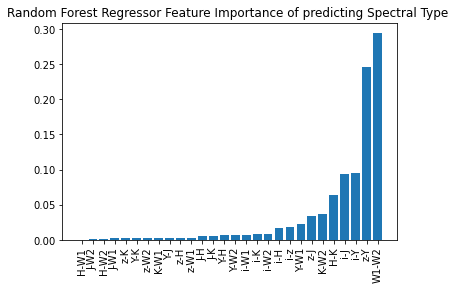

In [255]:
#feature importance
fig, ax=plt.subplots()
tree_feature_importances = (
    best_model.feature_importances_)
    
sorted_idx = tree_feature_importances.argsort()

x_ticks = np.arange(0, len(features))
ax.bar(x_ticks, tree_feature_importances[sorted_idx])
ax.set_xticklabels(np.array(features)[sorted_idx], rotation='vertical')
ax.set_xticks(x_ticks)
ax.set_title("Random Forest Regressor Feature Importance of predicting Spectral Type ")
plt.savefig("C:/pythonplot/plot/featureimportanceregressor.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [256]:
best_model.feature_importances_

array([0.01827854, 0.09467098, 0.09355709, 0.01642415, 0.00795969,
       0.00759534, 0.00824769, 0.24660498, 0.03476229, 0.00341007,
       0.00239023, 0.00356829, 0.00309415, 0.0032979 , 0.00650723,
       0.0029659 , 0.02343659, 0.00692376, 0.00556388, 0.00581626,
       0.00233277, 0.00103568, 0.06429456, 0.00071878, 0.00203713,
       0.00329549, 0.03692237, 0.2942882 ])

In [257]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 20
#parameters tuning
param={'n_estimators':[200,300,400,500,600]}
grid = RandomizedSearchCV(RF_reg2, param_distributions=param,n_iter=n_iter_search)

grid.fit(X_train, y_train)

#return the best estimator
best_estimator = grid.best_estimator_
print(best_estimator)
#the best score
print(grid.best_score_)

RandomForestRegressor(n_estimators=200)
0.9332287602527998


In [258]:
from sklearn.model_selection import GridSearchCV

gc=GridSearchCV(RF_reg2,param_grid=param,cv=5)#Number of cross-validation
gc.fit(X_train,y_train)#Cross-validation in the training set has nothing to do with the test set
print('The accuracy of prediction on the test set is',gc.score(X_test,y_test))
print('Best results in cross-validation',gc.best_score_)
print('The best estimador to choose is',gc.best_estimator_)
print('Results of cross-validation for each hyperparameter',gc.cv_results_)

The accuracy of prediction on the test set is 0.970224007397942
Best results in cross-validation 0.9338994435659688
The best estimador to choose is RandomForestRegressor(n_estimators=500)
Results of cross-validation for each hyperparameter {'mean_fit_time': array([0.65984235, 0.88186603, 1.05087538, 1.31249404, 1.89214001]), 'std_fit_time': array([0.03826268, 0.05356204, 0.10677791, 0.26722433, 0.26056078]), 'mean_score_time': array([0.02360363, 0.03180366, 0.03780274, 0.04900522, 0.06380162]), 'std_score_time': array([0.00162565, 0.00040104, 0.00511546, 0.00704435, 0.00098322]), 'param_n_estimators': masked_array(data=[200, 300, 400, 500, 600],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 200}, {'n_estimators': 300}, {'n_estimators': 400}, {'n_estimators': 500}, {'n_estimators': 600}], 'split0_test_score': array([0.91881084, 0.92400343, 0.919101  , 0.92714314, 0.92399714]), 'split1_test_score': arr

In [175]:
y_pred = RF_reg2.predict(X_test)

In [176]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
723,61.0,61.390
566,44.0,44.200
840,32.0,32.030
662,45.0,42.165
367,31.0,29.880
1072,64.0,63.155
926,63.0,61.765
1155,34.0,30.730
887,36.0,32.255
1127,30.0,30.145


In [177]:
df["diference"]=df["Actual"]-df["Predicted"]
df

,Actual,Predicted,diference
723,61.0,61.390,-0.390
566,44.0,44.200,-0.200
840,32.0,32.030,-0.030
662,45.0,42.165,2.835
367,31.0,29.880,1.120
1072,64.0,63.155,0.845
926,63.0,61.765,1.235
1155,34.0,30.730,3.270
887,36.0,32.255,3.745
1127,30.0,30.145,-0.145


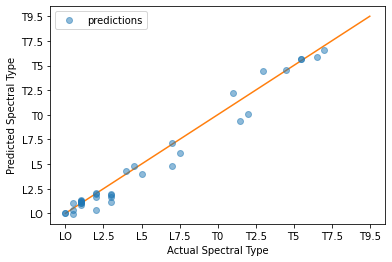

In [178]:
fig, ax=plt.subplots()
ax.errorbar(y_test, y_pred, fmt='o', alpha=0.5,label="predictions")
ax.set(xlabel='Actual Spectral Type', ylabel='Predicted Spectral Type')

plt.xticks([30, 35, 40, 45,50,55,60,65,70], ['LO','L2.5', 'L5','L7.5', 'T0','T2.5','T5','T7.5','T9.5'],rotation=0)
plt.yticks([30, 35, 40, 45,50,55,60,65,70], ['LO','L2.5', 'L5','L7.5', 'T0','T2.5','T5','T7.5','T9.5'],rotation=0)
x = np.linspace(30,70,70)
plt.legend()
y=x
ax.plot(x, y)
plt.savefig("C:/pythonplot/plot/ActualVsPredictedregressor1.png",bbox_inches="tight",pad_inches=2,transparent=True)

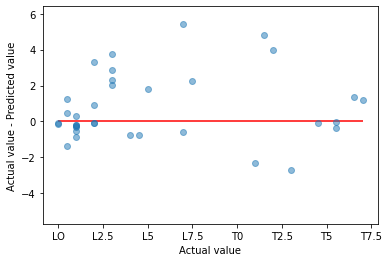

In [219]:
#fig, ax=plt.subplots()
plt.errorbar(y_test, df["diference"], fmt='o', alpha=0.5)
plt.xlabel('Actual value')
plt.ylabel('Actual value - Predicted value')
plt.xticks([30, 35, 40, 45,50,55,60,65,70], ['LO','L2.5', 'L5','L7.5', 'T0','T2.5','T5','T7.5','T9.5'],rotation=0)
plt.hlines(y=0,xmin=min(y_test),xmax=max(y_test),colors="red")
plt.ylim(min(df["diference"])-3,max(df["diference"])+1)
plt.savefig("C:/pythonplot/plot/ActualVsPredicteddiferrenceregressor1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)